# 2. Data Visualization

**Table of Contents**

Comparison of Scores in Each Student Category Using Bar Plots

* Gender
* Ethnicity
* English-Language Fluency
* Economi Status
* Disability Status
* Parent Education

Comparison in Best or Worst Performance Groups Using Bar Plots

* Overall Characteristics for Countries
* House Prices
* Student Categories

Correlation Using Scatterplots

* Test Achievements vs House Prices

**Data Loading**

The data has been cleaned in the data wrangling notebook `data_wrangling.ipynb` file.
Here we load the saved data `final_school_data.csv`. This dataset is too large to commit to GitHub.


In [2]:
import pandas as pd
import numpy as np

# To find the file encoding type
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
import re
import glob

# plotly
import plotly.express as px
import plotly.graph_objs as go
import cufflinks as cf

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('final_school_data.csv', sep='\t', encoding='utf-8')
final_data = df
final_data.drop("Unnamed: 0",axis=1, inplace=True)

In [5]:
final_data.head()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
0,1,All Students,All Students,1,10017,112607,2018,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612,English,14.58,31.25,33.33,20.83,96.0,25.00,50.00,25.00,17.71,58.33,23.96,13.54,75.00,11.46,29.17,53.13,17.71,696900.0
1,1,All Students,All Students,1,10017,112607,2018,9,Alameda,Envision Academy For Arts & Technology,Envision Academy For Arts & Technology,94612,Mathematics,3.13,16.67,31.25,48.96,96.0,7.29,32.29,60.42,7.29,47.92,44.79,7.29,62.50,30.21,0.00,0.00,0.00,696900.0
2,1,All Students,All Students,1,61259,3030772,2018,9,Alameda,Oakland School For The Arts,Oakland School For The Arts,94612,English,33.00,39.55,14.86,12.59,397.0,47.21,37.31,15.48,43.12,41.30,15.58,30.20,59.14,10.66,43.40,44.92,11.68,696900.0
3,1,All Students,All Students,1,61259,3030772,2018,9,Alameda,Oakland School For The Arts,Oakland School For The Arts,94612,Mathematics,31.09,20.90,23.88,24.13,402.0,37.91,29.68,32.42,33.33,40.80,25.87,32.84,46.77,20.40,0.00,0.00,0.00,696900.0
4,1,All Students,All Students,1,61259,6057095,2018,7,Alameda,Oakland Unified,Westlake Middle,94612,English,2.70,14.11,17.72,65.47,333.0,5.71,26.43,67.87,5.11,27.63,67.27,3.60,45.05,51.35,8.41,35.44,56.16,696900.0


In [6]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427080 entries, 0 to 427079
Data columns (total 31 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Subgroup ID                       427080 non-null  int64  
 1   Student Groups                    427080 non-null  object 
 2   Category                          427080 non-null  object 
 3   County Code                       427080 non-null  int64  
 4   District Code                     427080 non-null  int64  
 5   School Code                       427080 non-null  int64  
 6   Test Year                         427080 non-null  int64  
 7   Type Id                           427080 non-null  int64  
 8   County Name                       427080 non-null  object 
 9   District Name                     427080 non-null  object 
 10  School Name                       427080 non-null  object 
 11  Zip Code                          427080 non-null  i

**Aggregation (School data to District and Country levels)**

The sore data at a country or district level is not available. Thus school data is grouped into the country or the district level. We only select the school data (`Type Id` == 7).
* **`Type Id`: Type of scores**
    * `Type Id('04' = State, '05' = County, '06' = District, '07' = School, '09' = Direct Funded Charter School, '10' = Locally Funded Charter School)`

In [7]:
final_data.groupby("Type Id").count()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
Type Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382,379382
9,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600,34600
10,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098,13098


In [49]:
# school level data

# for later use
# correct spelling - final_data_school_all
final_data_scholl_all = final_data.copy()

final_data_school = final_data.loc[(final_data["Type Id"] == 7)]
final_data_school = final_data_school.round(2)
final_data_school['House_median'] = final_data_school['House_median'].astype('int64')
final_data = final_data_school

6539


In [61]:
print('Unique count of School Name:',final_data_school["School Name"].nunique())
print('final data shape:', final_data.shape)

Unique count of School Name: 6539
final data shape: (379382, 31)


In [82]:
# county-level data
final_data_county = final_data.groupby(["County Name", "Student Groups", "Category", "Test Id"], as_index=False).mean(numeric_only=True)

final_data_county = final_data_county.round(2)
final_data_county['House_median'] = final_data_county['House_median'].astype('int64')

In [83]:
print(final_data_county.columns[0])
print(final_data_county['County Name'].nunique())

County Name
52


In [84]:
# district-level data
final_data_district = final_data.groupby(["District Name", "Student Groups", "Category", "Test Id"], as_index=False).mean(numeric_only=True)

final_data_district = final_data_district.round(2)
final_data_district['House_median'] = final_data_district['House_median'].astype('int64')

In [86]:
print(final_data_district.columns[0])
print(final_data_district["District Name"].nunique())

District Name
784


**Hypothesis**

We first start with the following hypothesis

* The schools with many Asian students tend to achieve high scores
* The schools with high-income families tend to achieve high scores
* The schools with highly educated parents tend to achieve high scores
* The shools surrounded byhigh house cost tend to achieve high scores

**Types of graphs**

The data was explored to find trends, insights and potential outliers. In this california score data, there are 52 counties, 784 districts, and 6,539 schools.

* **Comparism (Bar plot)**
* **Correlations (Scatterplot)**
* **Distribution (Histogram)**
* **Time-Series plot**

## Comparison of Scores in each Student Category using Bar plots
**How students are different in achievement levels for each category?**

We provide two different versions of bar plots for each category. The data is grouped by counties:

* all four achievement levels in a stacked bar
* specific achievement levels in a parallelized bar

### [Results]

* **Gender:**
* **Ethnicity:**
* **English-Language Fluency:**
* **Economic Status:**
* **Disability Status:**
* **Parent Education:**

The students groups in each category are as follows.

In [88]:
# Student Groups (available in final_data)
final_data_school.groupby(["Category", "Student Groups"]).count()

Subgroup ID  \
Category                                     Student Groups                                                    
All Students                                 All Students                                              15313   
Disability Status                            Students with disability                                  13572   
                                             Students with no reported disability                      15181   
Economic Status                              Economically disadvantaged                                14960   
                                             Not economically disadvantaged                            13760   
English-Language Fluency                     English learner                                           12575   
                                             English learners (ELs) enrolled in school in th...          310   
                                             English learners enrolled in school in the U.S....        12412   
                                             English only                                              14976   
                                             Ever-ELs                                                  14239   
                                             Fluent English proficient and English only                15238   
                                             Initial fluent English proficient (IFEP)                   6118   
                                             Reclassified fluent English proficient (RFEP)             13118   
                                             To be determined (TBD)                                        7   
Ethnicity                                    American Indian or Alaska Native                            231   
                                             Asian                                                      7095   
                                             Black or African American                                  6128   
                                             Filipino                                                   3215   
                                             Hispanic or Latino                                        14752   
                                             Native Hawaiian or Pacific Islander                         393   
                                             Two or more races                                          5930   
                                             White                                                     11214   
Ethnicity for Economically Disadvantaged     American Indian or Alaska Native                            145   
                                             Asian                                                      4372   
                                             Black or African American                                  4756   
                                             Filipino                                                   1048   
                                             Hispanic or Latino                                        13838   
                                             Native Hawaiian or Pacific Islander                         222   
                                             Two or more races                                          1899   
                                             White                                                      8652   
Ethnicity for Not Economically Disadvantaged American Indian or Alaska Native                             40   
                                             Asian                                                      4598   
                                             Black or African American                                  1923   
                                             Filipino                                                   2138   
                                             Hispanic or Latino  

In [89]:
# finalize the data for visualization
final_data = final_data_county

In [109]:
# all four achivement levels in a stacked bar
def stackedbar(df, category):
    scoreLevel = re.sub('Name', '', df.columns[0])
    
    df_local=df.loc[df['Category'] == category]
    graph_columns = ['Category', 'Student Groups', 'Test Id', 'Percentage Standard Not Met', 'Percentage Standard Nearly Met', 'Percentage Standard Met', 'Percentage Standard Exceeded']
    
    x= df_local[graph_columns]
    y= x.set_index(['Category', 'Student Groups', 'Test Id'])
    z= y.groupby(['Student Groups', 'Test Id']).mean()
    # TBD - use Bokeh libraries for exact number labeling
    z.plot.bar(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xticks(rotation=90)
    plt.title(scoreLevel + "; " + category)
    

In [96]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [112]:
init_notebook_mode(connected=True)
cf.go_offline()

def stackedbar_interactive(df, category):
    scoreLevel = re.sub('Name', '', df.columns[0])
    
    df_local=df.loc[df['Category'] == category]
    graph_columns = ['Category','Student Groups','Test Id', 'Percentage Standard Not Met','Percentage Standard Nearly Met', 'Percentage Standard Met', 'Percentage Standard Exceeded']
    
    df_local=df_local[graph_columns]
    df_local=df_local.set_index(['Student Groups', 'Test Id'])
    df_local_group_by=df_local.groupby(['Student Groups', 'Test Id']).mean(numeric_only=True)

    cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
    df_local_group_by.iplot(kind='bar', barmode='stack', filename='cufflinks/stacked-bar-chart', title=category)


In [98]:
final_id_vars = ['Subgroup ID',
 'Student Groups',
 'Category',
 'County Code',
 'District Code',
 'School Code',
 'Test Year',
 'Type Id',
 'School Name', 'District Name', 'County Name',
 'Zip Code',
 'Test Id',
 'Students with Scores',
 'Area 1 Percentage Above Standard',
 'Area 1 Percentage Near Standard',
 'Area 1 Percentage Below Standard',
 'Area 2 Percentage Above Standard',
 'Area 2 Percentage Near Standard',
 'Area 2 Percentage Below Standard',
 'Area 3 Percentage Above Standard',
 'Area 3 Percentage Near Standard',
 'Area 3 Percentage Below Standard',
 'Area 4 Percentage Above Standard',
 'Area 4 Percentage Near Standard',
 'Area 4 Percentage Below Standard',
 'House_median']

final_value_vars = ['Percentage Standard Exceeded',
 'Percentage Standard Met',
 'Percentage Standard Nearly Met',
 'Percentage Standard Not Met']

In [99]:
final_data_ex = pd.melt(final_data_school, id_vars=final_id_vars, value_vars=final_value_vars, var_name='Performance Group', value_name='Performance Group Percentage')
final_data_ex.head()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,School Name,District Name,County Name,Zip Code,Test Id,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median,Performance Group,Performance Group Percentage
0,1,All Students,All Students,1,61259,6057095,2018,7,Westlake Middle,Oakland Unified,Alameda,94612,English,333.0,5.71,26.43,67.87,5.11,27.63,67.27,3.60,45.05,51.35,8.41,35.44,56.16,696900,Percentage Standard Exceeded,2.70
1,1,All Students,All Students,1,61259,6057095,2018,7,Westlake Middle,Oakland Unified,Alameda,94612,Mathematics,345.0,3.19,17.68,79.13,4.06,25.22,70.72,1.16,31.01,67.83,0.00,0.00,0.00,696900,Percentage Standard Exceeded,1.74
2,1,All Students,All Students,1,61259,100701,2018,7,Metwest High,Oakland Unified,Alameda,94606,Mathematics,41.0,4.88,24.39,70.73,2.44,34.15,63.41,2.44,58.54,39.02,0.00,0.00,0.00,684400,Percentage Standard Exceeded,0.00
3,1,All Students,All Students,1,61259,100701,2018,7,Metwest High,Oakland Unified,Alameda,94606,English,39.0,28.21,33.33,38.46,10.26,46.15,43.59,20.51,64.10,15.38,20.51,43.59,35.90,684400,Percentage Standard Exceeded,12.82
4,1,All Students,All Students,1,61259,132688,2018,7,Dewey Academy,Oakland Unified,Alameda,94606,Mathematics,37.0,0.00,0.00,100.00,0.00,18.92,81.08,0.00,10.81,89.19,0.00,0.00,0.00,684400,Percentage Standard Exceeded,0.00


In [115]:
# specific achievement levels in a parallelized bar
def drawBarplotFacetGridEx(df, category, perfCols):
    df_local = df.loc[(df['Category'] == category)]
    
    df_local = df_local.loc[df_local['Performance Group'].isin(perfCols)]
    
    g = sns.FacetGrid(df_local, col="Test Id", height=6)
    g.map(sns.barplot, "Student Groups", "Performance Group Percentage", 'Performance Group', palette="rocket", errorbar=None )
    g.add_legend()
    g.set_xticklabels(rotation=90)
    g.fig.suptitle(category, size=20, x = 0.4, y = 1.1)
    plt.show()

### Gender
* [Overall in counties]

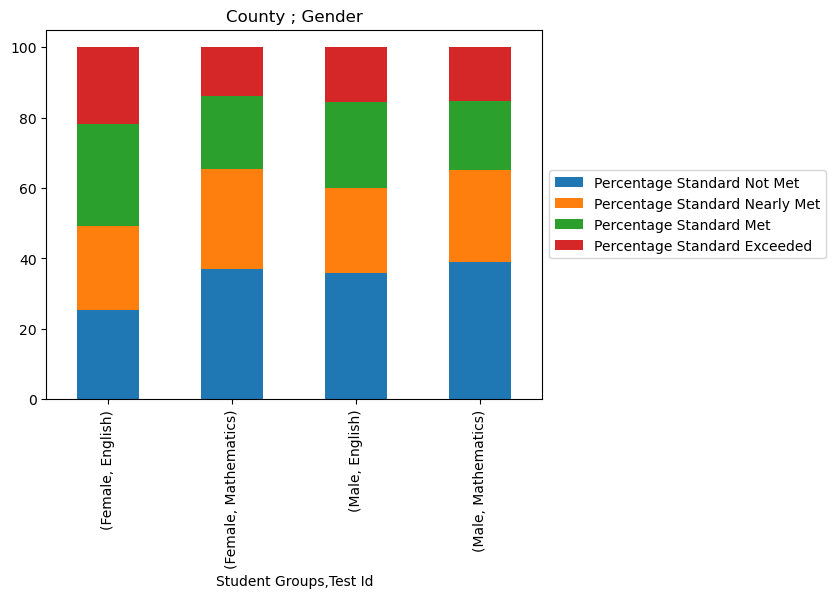

In [110]:
stackedbar(final_data, 'Gender')

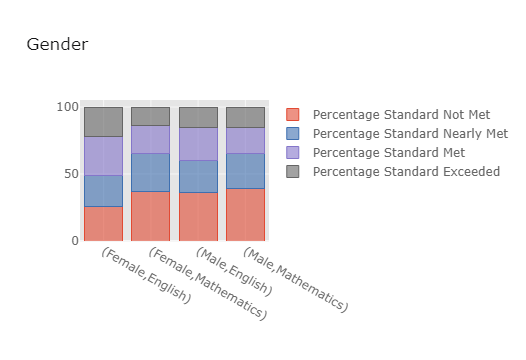

In [113]:
stackedbar_interactive(final_data, 'Gender')

C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\seaborn\axisgrid.py:718: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\seaborn\axisgrid.py:723: UserWarning:

Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.



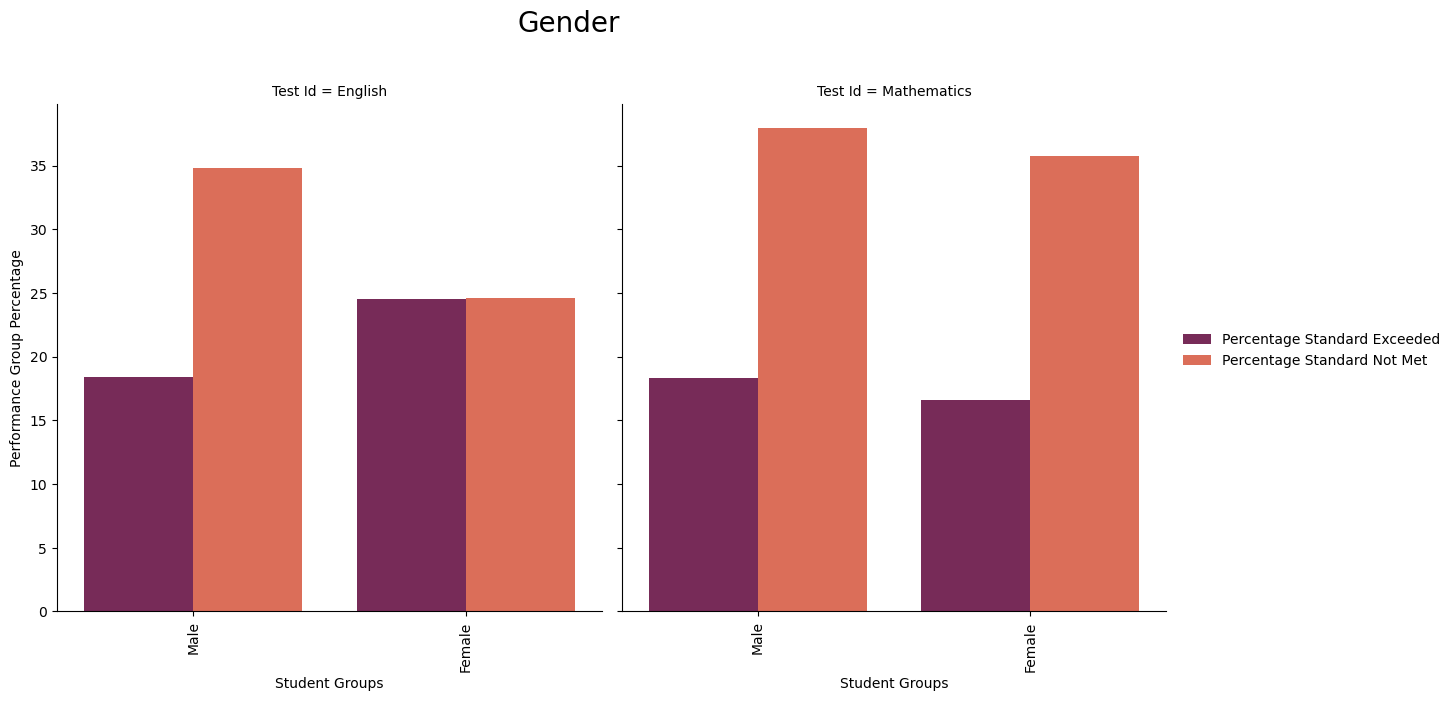

In [116]:
#FacetGrid : same legend
drawBarplotFacetGridEx(final_data_ex, 'Gender', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

### Ethnicity

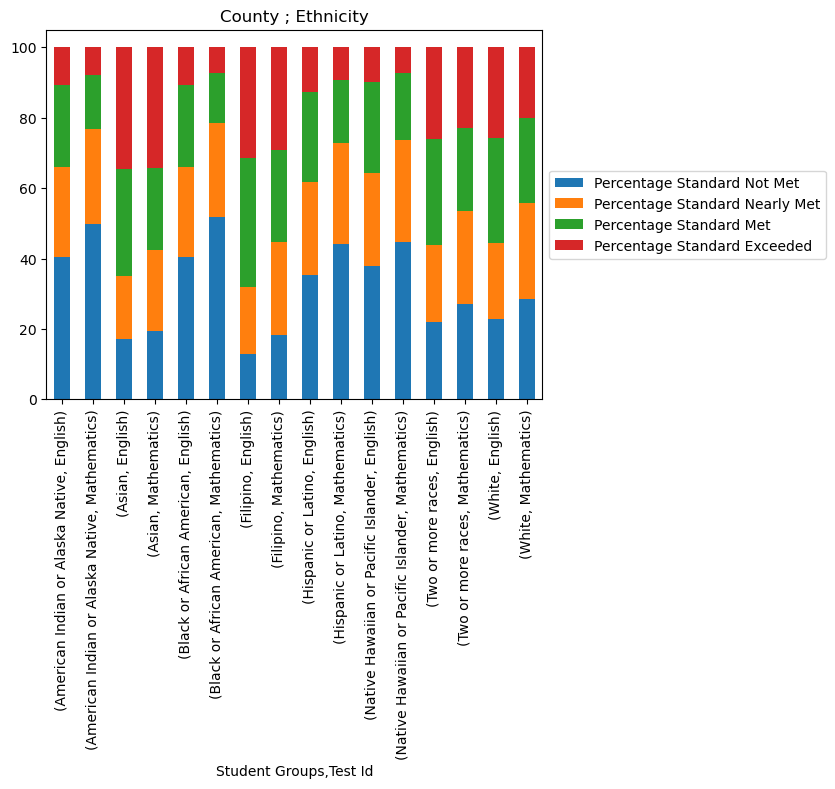

In [117]:
stackedbar(final_data, 'Ethnicity')

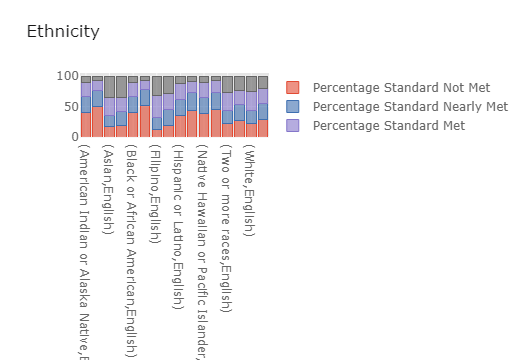

In [118]:
stackedbar_interactive(final_data, 'Ethnicity')

C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\seaborn\axisgrid.py:718: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\seaborn\axisgrid.py:723: UserWarning:

Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.



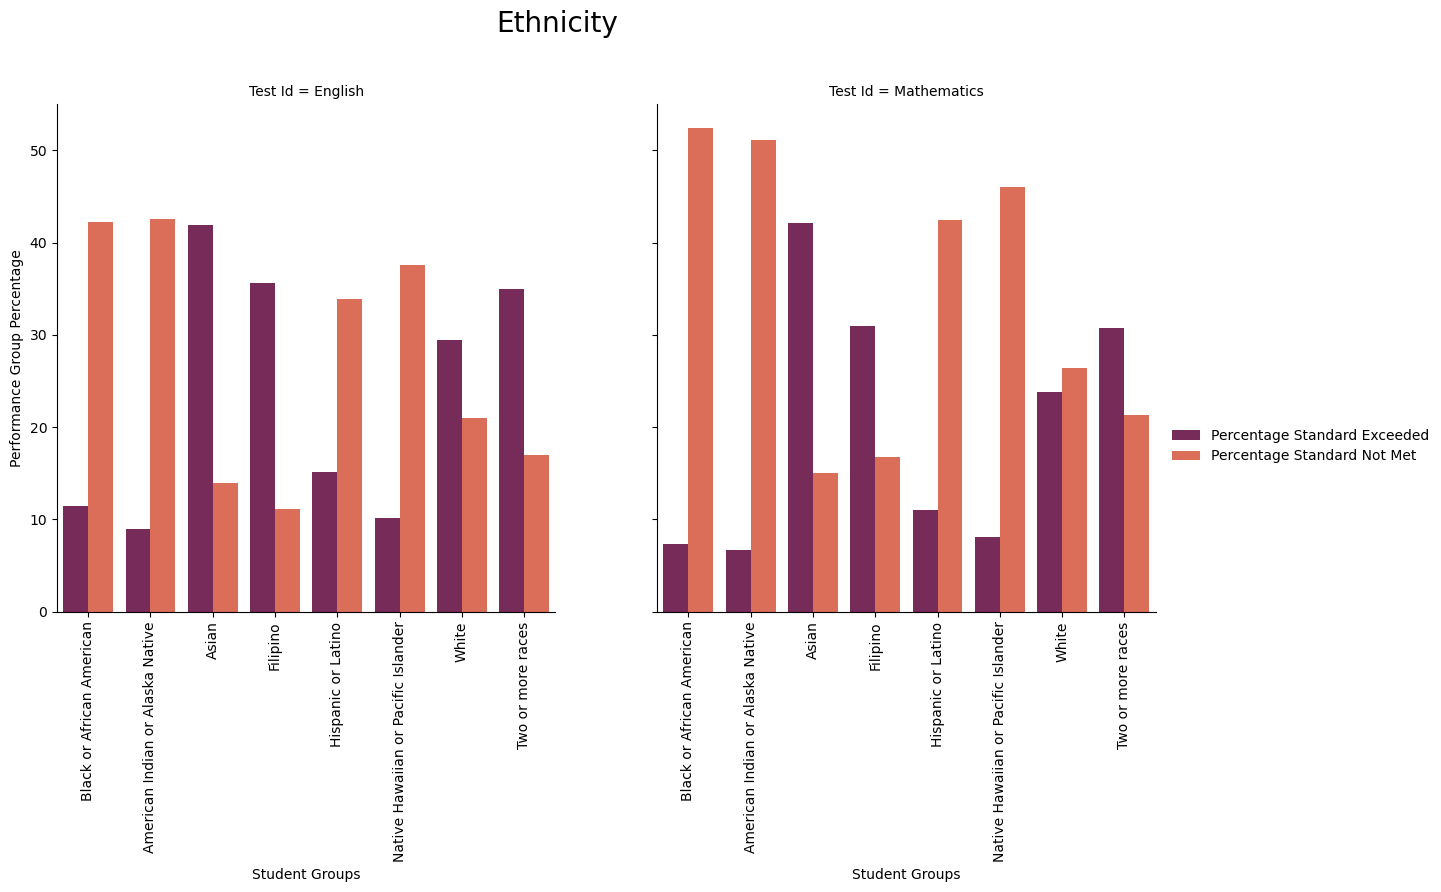

In [119]:
drawBarplotFacetGridEx(final_data_ex, 'Ethnicity', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

### English-Language Fluency

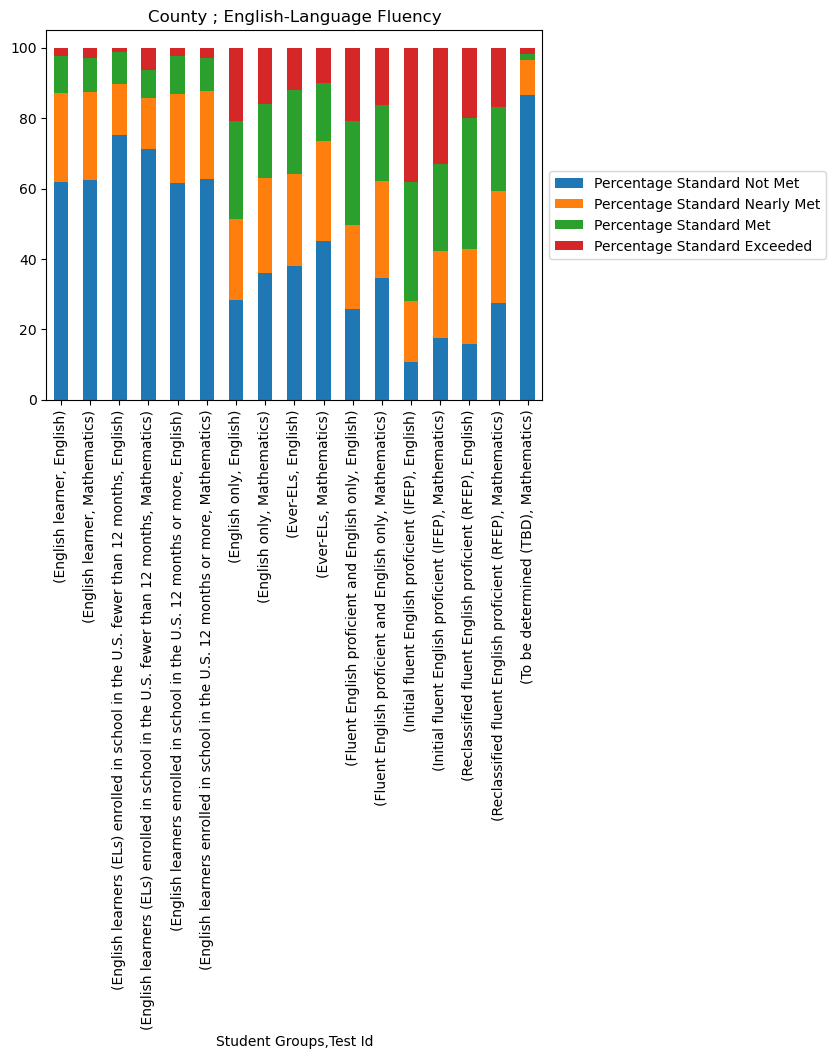

In [120]:
stackedbar(final_data, 'English-Language Fluency')

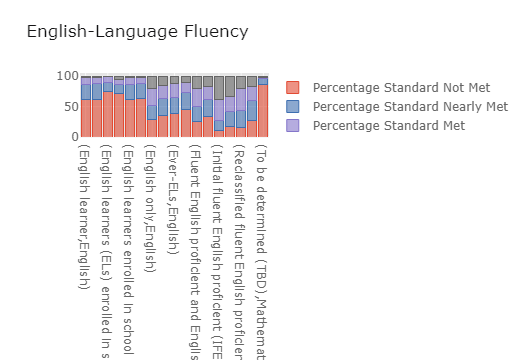

In [121]:
stackedbar_interactive(final_data, 'English-Language Fluency')

C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\seaborn\axisgrid.py:718: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\seaborn\axisgrid.py:723: UserWarning:

Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.



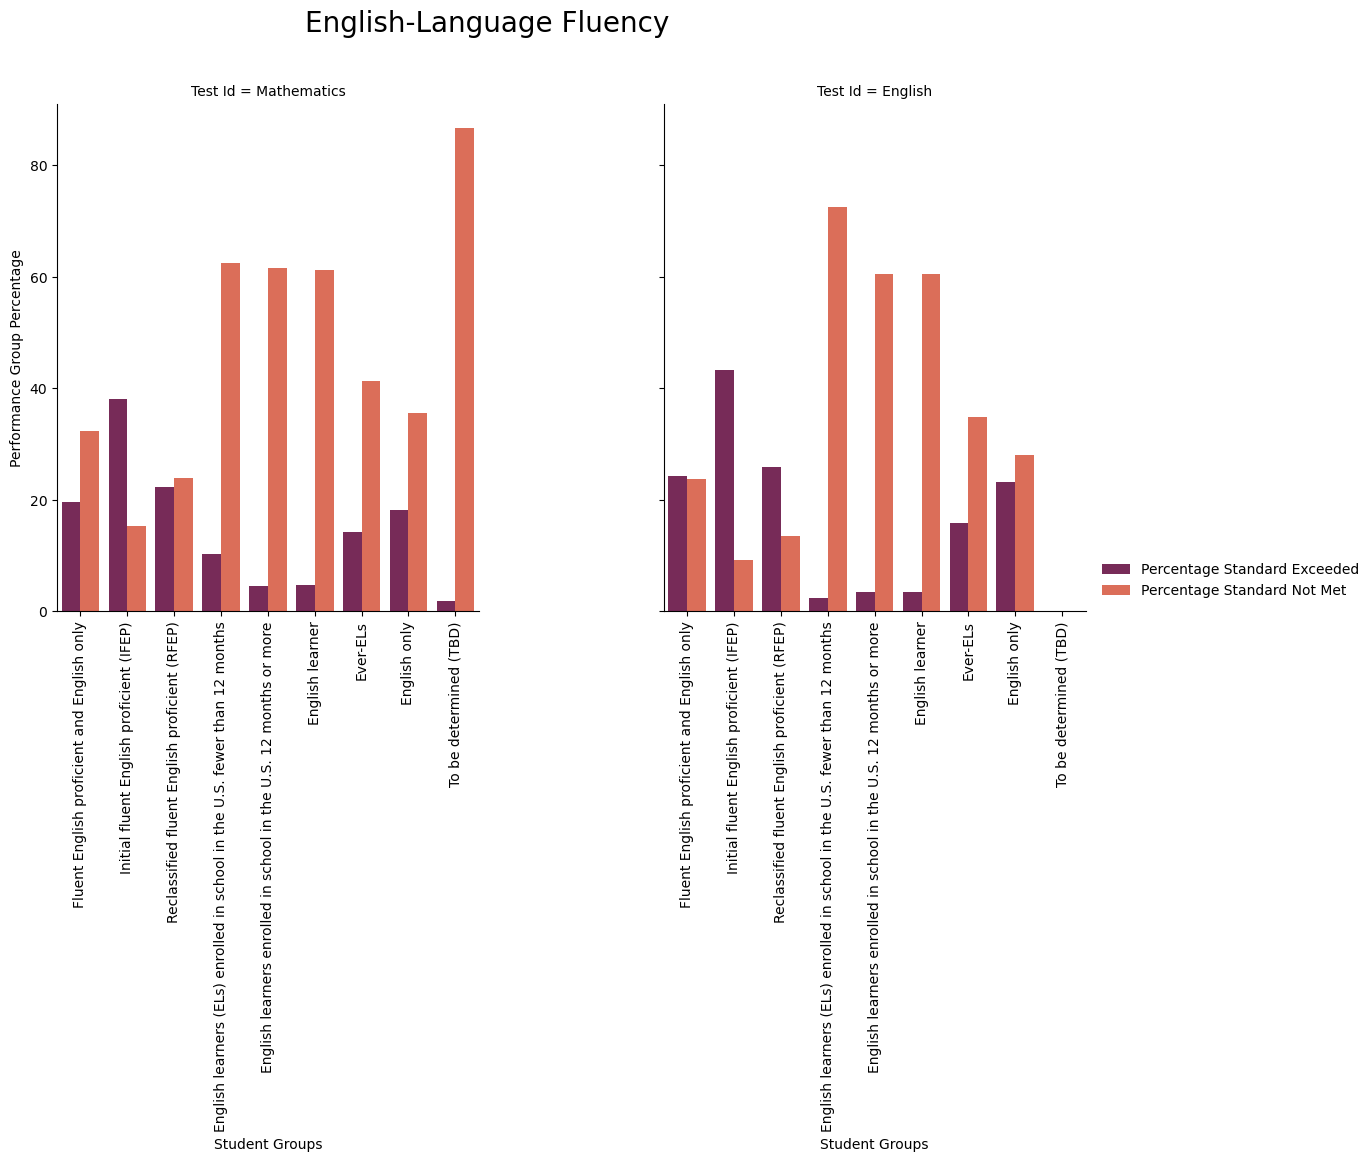

In [122]:
drawBarplotFacetGridEx(final_data_ex, 'English-Language Fluency', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

### Economic Status

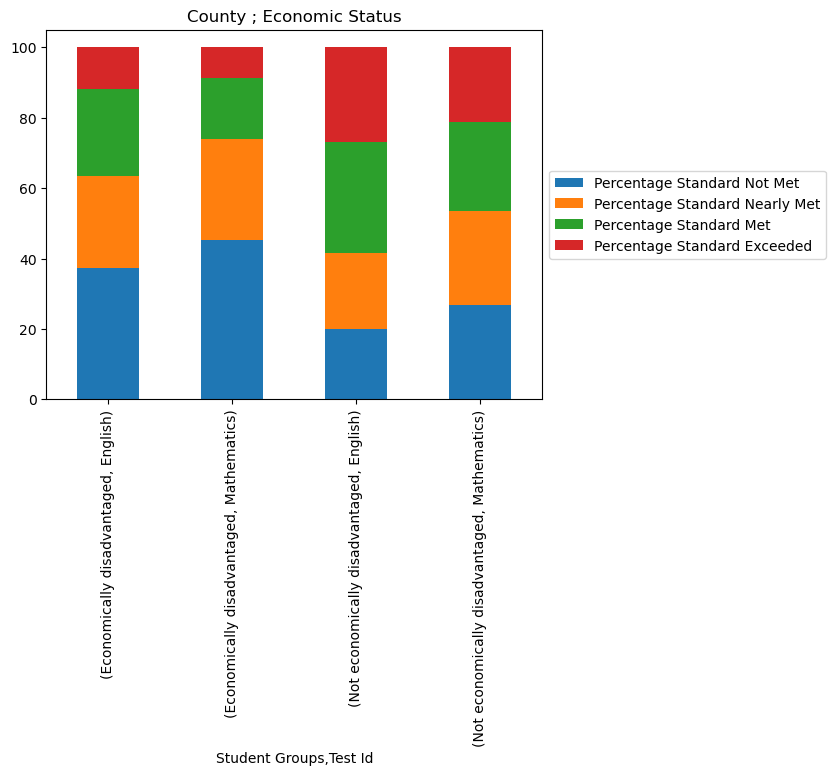

In [123]:
stackedbar(final_data, 'Economic Status')

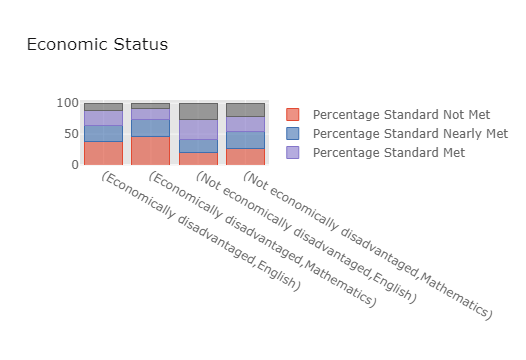

In [124]:
stackedbar_interactive(final_data, 'Economic Status')

C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\seaborn\axisgrid.py:718: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\seaborn\axisgrid.py:723: UserWarning:

Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.



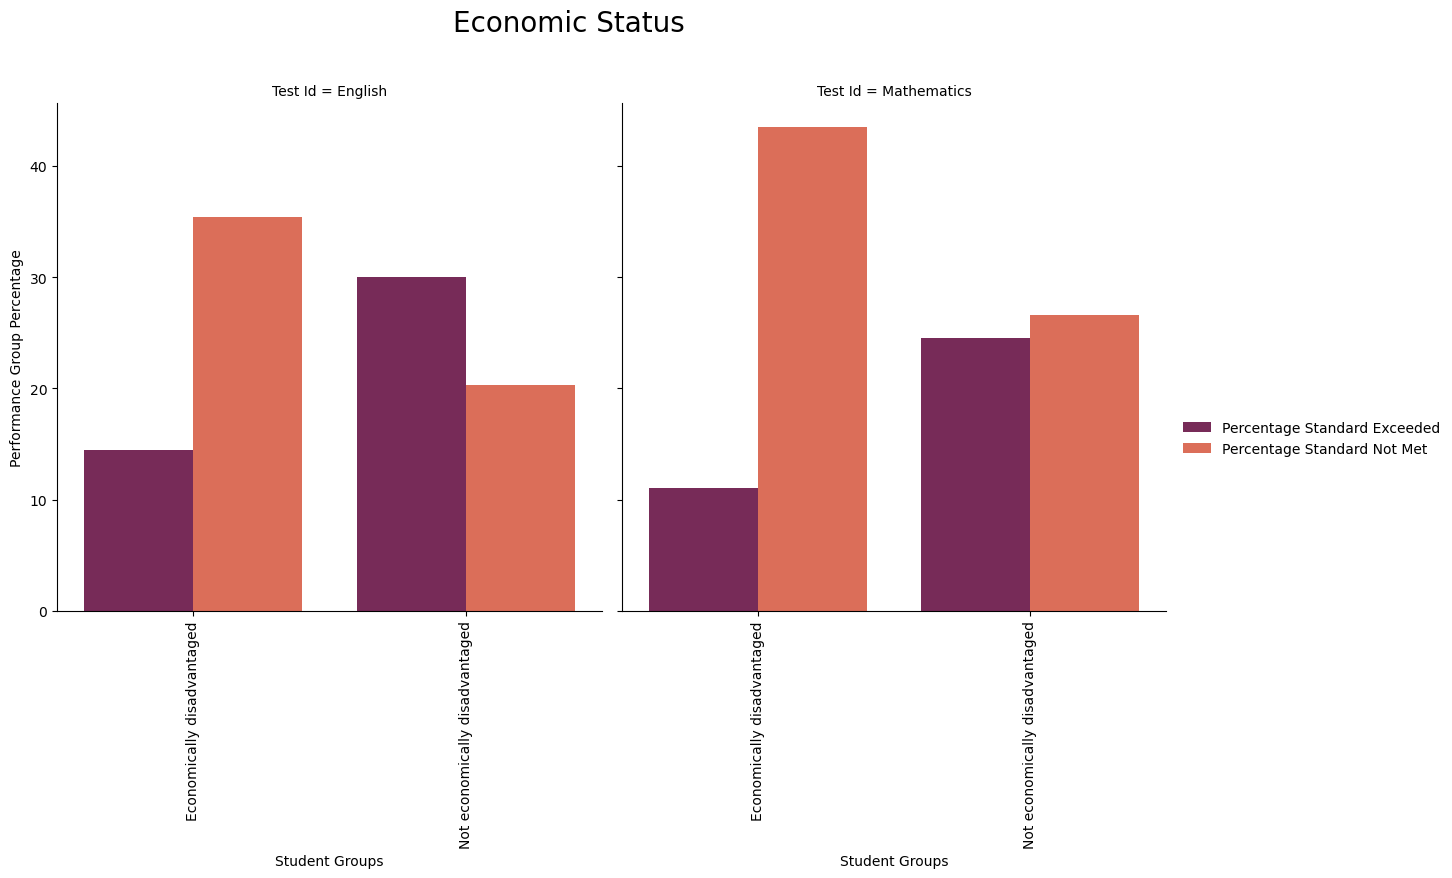

In [125]:
drawBarplotFacetGridEx(final_data_ex, 'Economic Status', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

### Disability Status

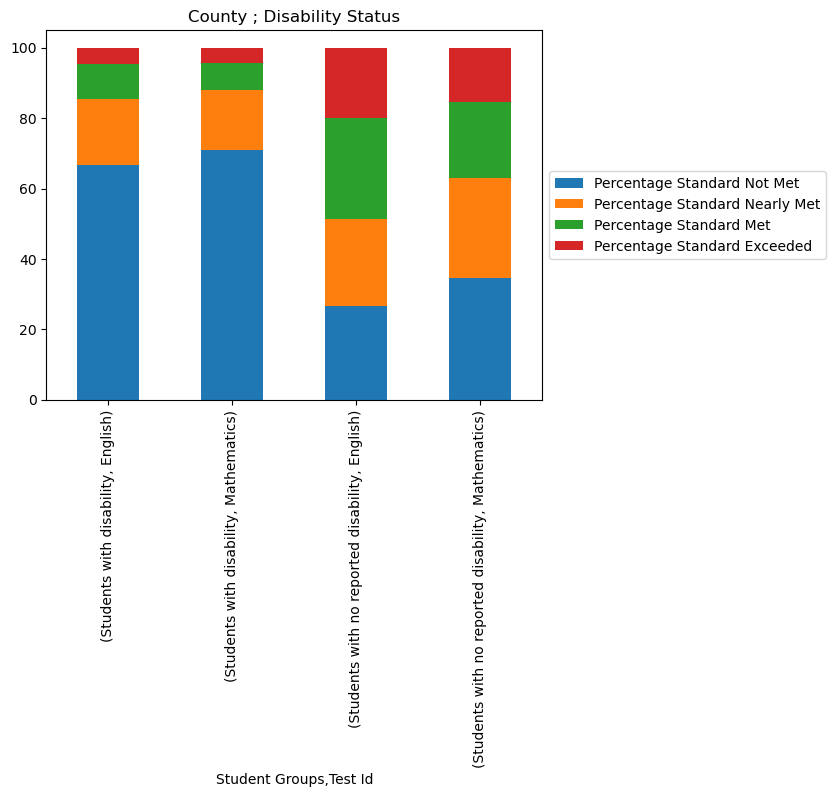

In [126]:
stackedbar(final_data, 'Disability Status')

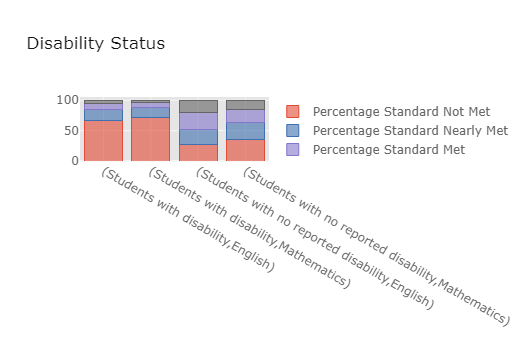

In [127]:
stackedbar_interactive(final_data, 'Disability Status')

C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\seaborn\axisgrid.py:718: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\seaborn\axisgrid.py:723: UserWarning:

Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.



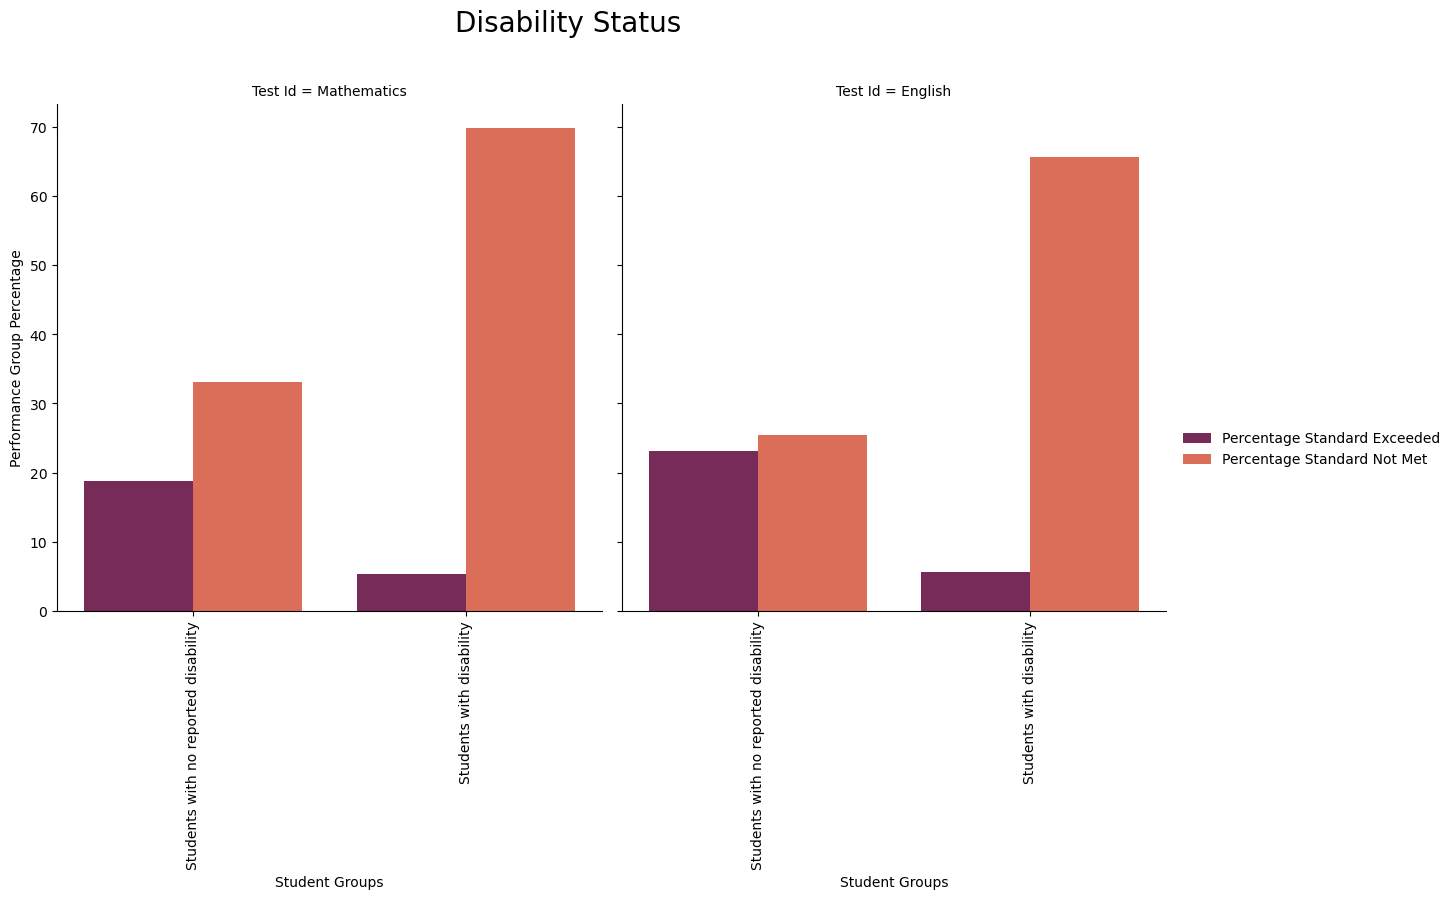

In [128]:
drawBarplotFacetGridEx(final_data_ex, 'Disability Status', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

### Parent Education

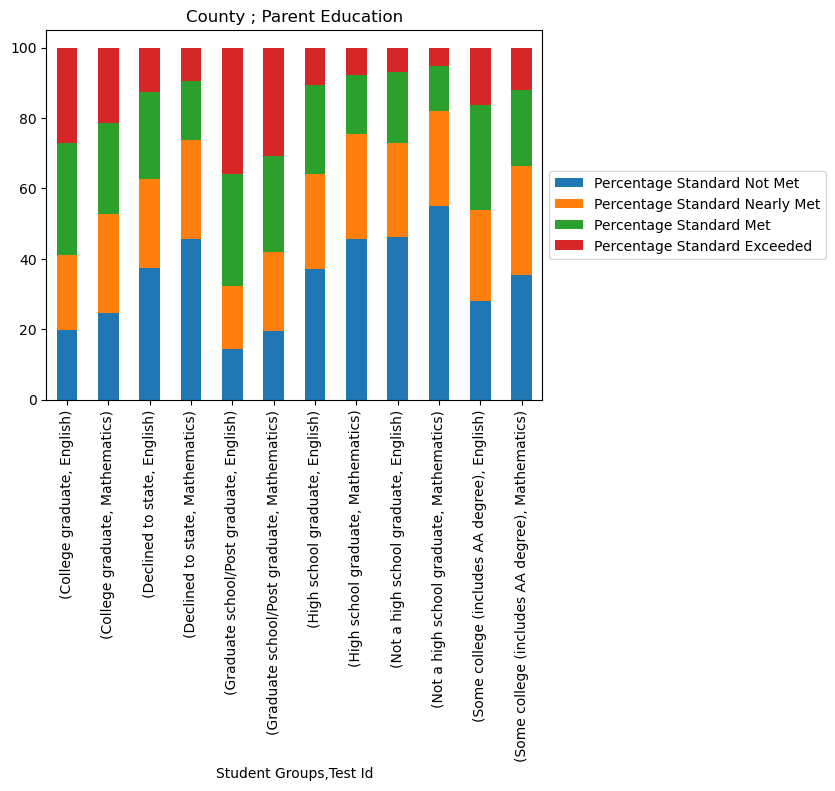

In [129]:
stackedbar(final_data, 'Parent Education')

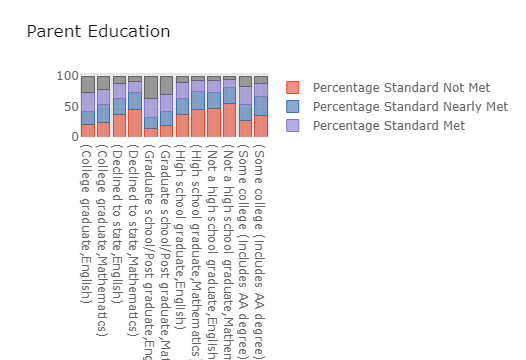

In [130]:
stackedbar_interactive(final_data, 'Parent Education')

C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\seaborn\axisgrid.py:718: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\seaborn\axisgrid.py:723: UserWarning:

Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.



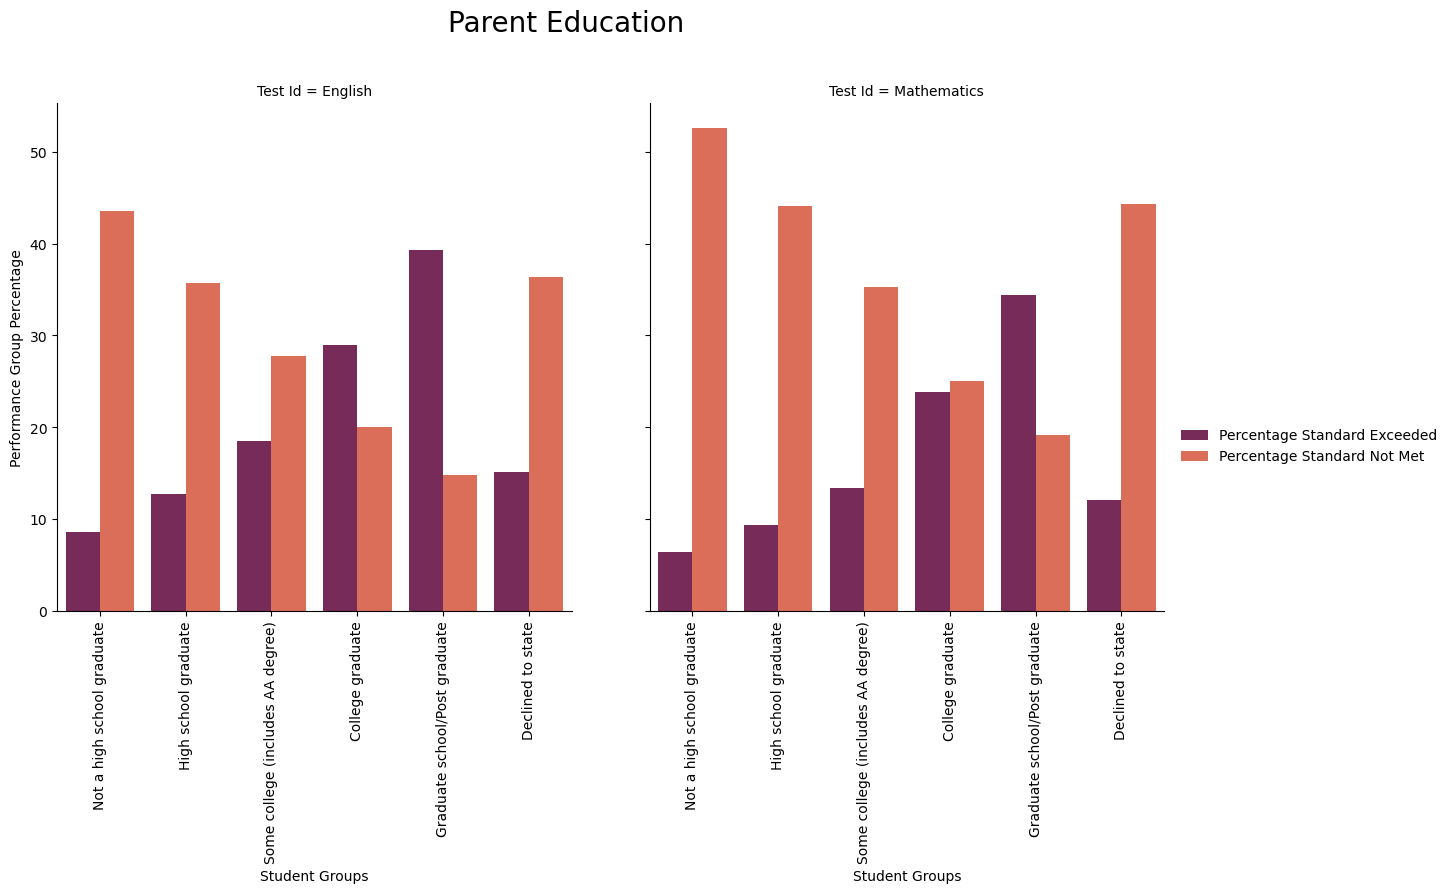

In [131]:
drawBarplotFacetGridEx(final_data_ex, 'Parent Education', ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

## Comparison in Best or Worst Performance Groups Using Bar Plots

**What features can you find in the top and bottom performance groups?** 

We analyzed **5 best and worst performing counties** (58 counties x 10%).
The results can be summarized as follows.
* **English Top 5** County Names:
['Santa Clara', 'Marin', 'Placer', 'San Mateo', 'Orange']
* **Mathematics Top 5** County Names:
['Santa Clara', 'Marin', 'San Mateo', 'Orange', 'Placer']
* **English Low 5** County Names:
['Lake', 'Kings', 'Colusa', 'Humboldt', 'Monterey']
* **Mathematics Low 5** County Names:
['Lake', 'Kings', 'Merced', 'Mendocino', 'Monterey']

### [Results]

* The best performance counties have higher house median prices. In contrast, the worst performance counties have lower house median prices. **Thus, test performance is closely related to the economic capabilities of the family to which the student belongs.**

* We found that in the best performing counties, the percentage of white students is much higher than the percentage of white students in the whole county.

* Hispanic and Latino students are far more likely to be in the worst performing group than the best performing group. Likewise, Black and American Indian students are more involved in the group with the worst results. In contrast, Asian and white students are more likely to be in the best performing group than the worst performing group.

* The English learners have more difficulties in studying both English and Mathematics than the fluent English speakers.

* When students' parents graduate from graduate schools/post graduates or colleges, students are much more likely to be in the best performing group. For those students, the best performing groups are much larger than the worst performing groups. In contrast, students are more likely to be in the worst performing group when their parents are high school graduates or have lower education.

### Overall Characteristics for Counties

To have a rough insight, we have drawn the graphs of the test scores (i.e. "Performance Group Percentage" of each "Performance Group")

In [132]:
sns.set_style(style='ticks')
sns.set(rc={'figure.figsize':(20,16)})

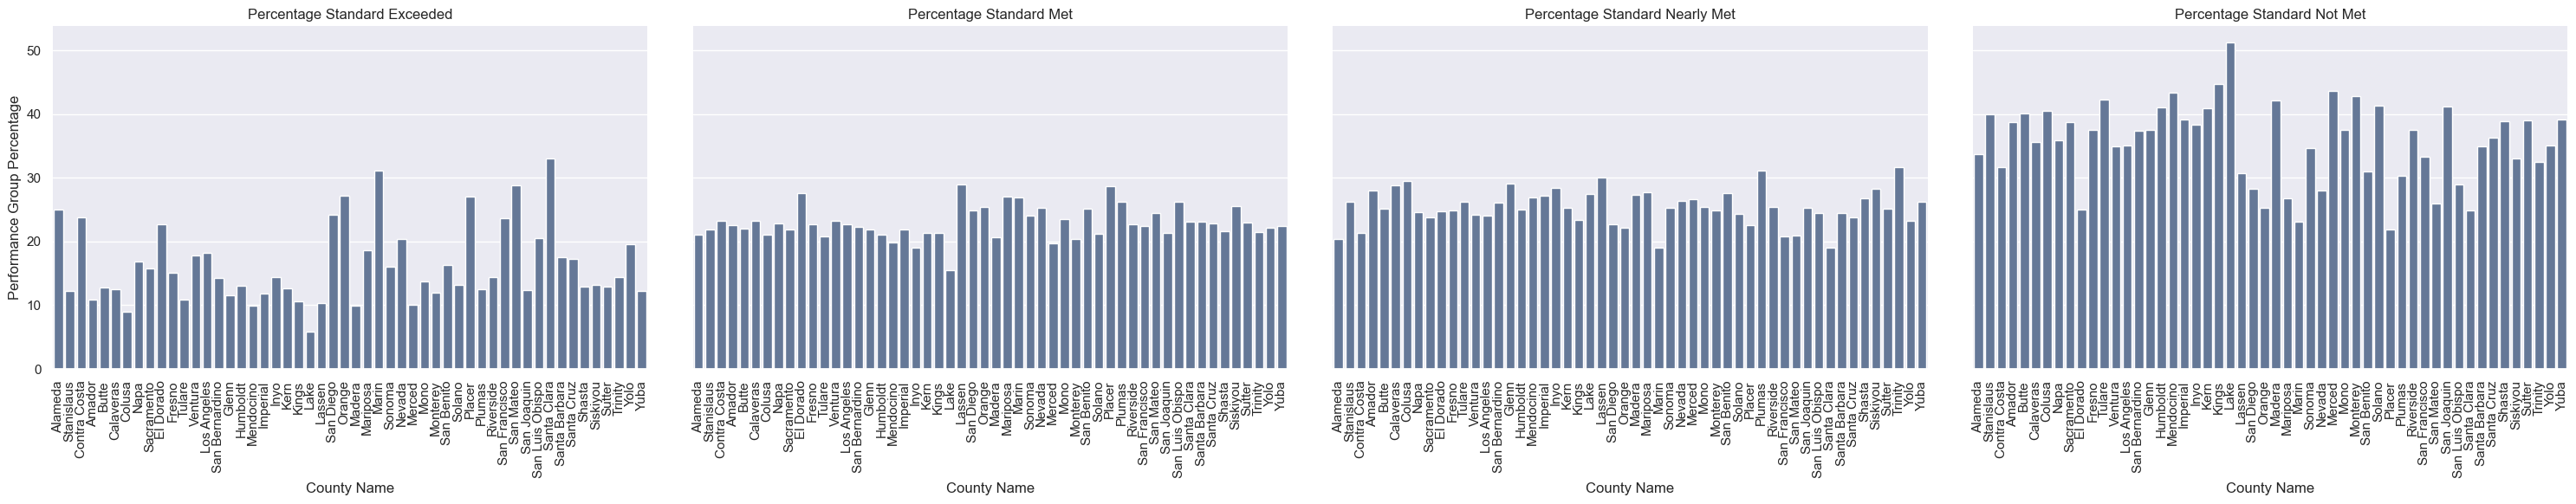

In [135]:
saturation_p = 0.5
aspect_p = 1.5

def drawBarplotCatplot2(df, category, saturation_p, aspet_p, _x, _y, _col):
    df_local = df.loc[(df["Category"] == category)]
    
    g = sns.catplot(x=_x, y=_y, col=_col,
                   data=df_local, saturation=saturation_p,
                   kind='bar', errorbar=None, aspect=aspect_p)
    (
        g.set_axis_labels(_x, _y)
        .set_titles("{col_name}")
        .despine(left=True)
        .set_xticklabels(rotation=90)
    )
    
drawBarplotCatplot2(final_data_ex, 'All Students', saturation_p, aspect_p, "County Name", "Performance Group Percentage", "Performance Group")

In [145]:
def getDfTop_Low(df, scoreLevel, num):
    english_df = df.loc[(df['Student Groups'] == 'All Students') &
                       (df["Test Id"] == "English")]
    english_top = english_df.nlargest(num, 'Percentage Standard Exceeded')
    english_low = english_df.nlargest(num, 'Percentage Standard Not Met')
    
    math_df = df.loc[(df["Student Groups"] == "All Students") & 
                    (df["Test Id"] == "Mathematics")]
    math_top = math_df.nlargest(num, 'Percentage Standard Exceeded')
    math_low = math_df.nlargest(num, 'Percentage Standard Not Met')
    
    print("{}{}{}{}{}".format("* English Top ", num, " ", scoreLevel,"s:"))
    #print Series
    print(english_top[scoreLevel].values.tolist())
    print("{}{}{}{}{}".format("* Mathematics Top ", num, " ", scoreLevel,"s:"))
    print(math_top[scoreLevel].values.tolist())
    print("{}{}{}{}{}".format("* English Low ", num, " ", scoreLevel,"s:"))
    print(english_low[scoreLevel].values.tolist())
    print("{}{}{}{}{}".format("* Mathematics Low ", num, " ", scoreLevel,"s:"))
    print(math_low[scoreLevel].values.tolist())
    
    # Retrive all data of the top and bottom school/districts/counties
    top_english_all = df.loc[(df[scoreLevel].isin(english_top[scoreLevel])) &
                            (df["Test Id"] == "English")]
    low_english_all = df.loc[(df[scoreLevel].isin(english_low[scoreLevel])) &
                                                   (df["Test Id"] == "English")]
      
    top_math_all = df.loc[(df[scoreLevel].isin(math_top[scoreLevel])) &
                                                  (df["Test Id"] == "Mathematics")]
    low_math_all = df.loc[(df[scoreLevel].isin(math_low[scoreLevel])) &
                                                   (df["Test Id"] == "Mathematics")]
    
    top_english_all["Rank"] = "Top"
    low_english_all["Rank"] = "Bottom"
    top_math_all["Rank"] = "Top"
    low_math_all["Rank"] = "Bottom"
    
    df_local = pd.concat([top_english_all, low_english_all, top_math_all, low_math_all])
    
    return df_local

In [146]:
dfTop_Low = getDfTop_Low(final_data_county, "County Name", 5)
dfTop_Low

* English Top 5 County Names:
['Santa Clara', 'Marin', 'Placer', 'San Mateo', 'Orange']
* Mathematics Top 5 County Names:
['Santa Clara', 'Marin', 'San Mateo', 'Orange', 'Placer']
* English Low 5 County Names:
['Lake', 'Kings', 'Colusa', 'Humboldt', 'Monterey']
* Mathematics Low 5 County Names:
['Lake', 'Kings', 'Merced', 'Mendocino', 'Monterey']


,County Name,Student Groups,Category,Test Id,Subgroup ID,County Code,District Code,School Code,Test Year,Type Id,Zip Code,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median,Rank
1275,Marin,All Students,All Students,English,1.0,21.0,65428.86,4843039.23,2018.0,7.0,94929.21,32.55,28.89,17.29,21.27,295.93,35.88,41.72,22.41,35.29,41.61,23.10,25.76,60.60,13.64,35.64,45.55,18.81,1227675,Top
1277,Marin,Asian,Ethnicity,English,76.0,21.0,65750.43,4986058.68,2018.0,7.0,94924.79,47.76,31.94,13.59,6.72,25.75,50.31,40.46,9.23,53.52,37.64,8.84,36.07,57.77,6.16,53.14,40.55,6.31,1246200,Top
1279,Marin,Asian,Ethnicity for Economically Disadvantaged,English,202.0,21.0,65449.75,3585184.25,2018.0,7.0,94913.50,19.44,50.88,14.66,15.03,16.25,24.20,55.08,20.72,25.84,55.42,18.74,21.82,65.36,12.82,36.01,52.67,11.32,1029675,Top
1281,Marin,Asian,Ethnicity for Not Economically Disadvantaged,English,222.0,21.0,65838.45,5233516.91,2018.0,7.0,94923.09,52.27,30.02,13.01,4.70,23.77,53.45,38.40,8.15,58.75,35.56,5.69,38.50,56.39,5.11,54.36,39.72,5.92,1306122,Top
1283,Marin,Black or African American,Ethnicity,English,74.0,21.0,65427.67,4398329.50,2018.0,7.0,94934.67,13.60,19.42,19.66,47.31,20.33,18.44,34.91,46.65,15.95,39.44,44.60,12.32,58.25,29.43,19.81,36.14,44.05,1132983,Top
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,Monterey,Two or more races,Ethnicity for Economically Disadvantaged,Mathematics,207.0,27.0,66092.00,6042485.17,2018.0,7.0,93941.50,4.91,14.90,27.62,52.57,20.50,11.18,29.67,59.14,5.59,40.32,54.09,8.07,44.27,47.66,0.00,0.00,0.00,569633,Bottom
1653,Monterey,Two or more races,Ethnicity for Not Economically Disadvantaged,Mathematics,227.0,27.0,66109.25,5626152.06,2018.0,7.0,93930.38,27.55,31.29,23.87,17.29,18.56,42.07,34.44,23.48,33.73,50.32,15.96,36.07,43.66,20.27,0.00,0.00,0.00,819293,Bottom
1655,Monterey,White,Ethnicity,Mathematics,80.0,27.0,66967.28,4761915.98,2018.0,7.0,93914.48,17.65,24.60,30.57,27.17,60.50,27.13,35.53,37.34,23.21,49.66,27.13,21.64,51.78,26.58,0.00,0.00,0.00,571923,Bottom
1657,Monterey,White,Ethnicity for Economically Disadvantaged,Mathematics,206.0,27.0,66971.63,4811674.61,2018.0,7.0,93909.18,11.56,18.94,30.90,38.59,22.32,17.78,33.59,48.63,15.61,46.95,37.44,13.64,51.77,34.59,0.00,0.00,0.00,614842,Bottom


### House Prices

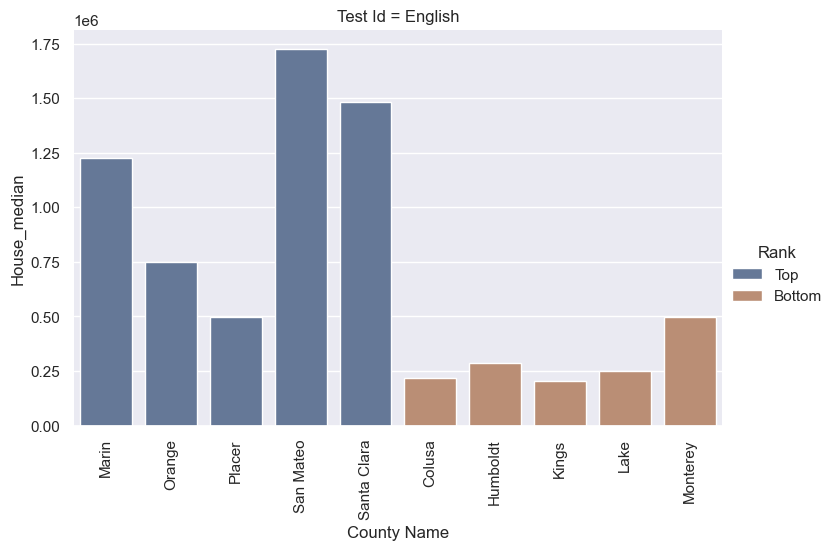

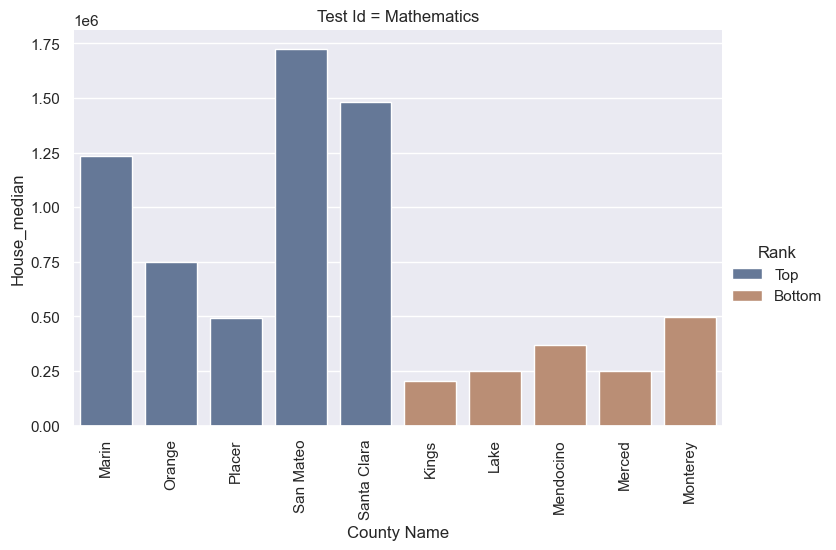

In [148]:
def drawBarplotCatplot1(df, category, testId, _x, _y, _hue, _col):
    df_local = df.loc[(df["Category"] == category) & (df['Test Id'] == testId)]
    g = sns.catplot(x=_x, y=_y, hue=_hue, col=_col,
                    data=df_local, saturation=saturation_p,
                    kind="bar", errorbar=None, aspect=aspect_p)
    (g.set_axis_labels(_x, _y)
     # .set_xticklabels(["Men", "Women", "Children"])
     #.set(ylim=(0, 1))
     .despine(left=True)
     .set_xticklabels(rotation=90))  

drawBarplotCatplot1(dfTop_Low, "All Students", "English", "County Name", "House_median", "Rank", "Test Id")
drawBarplotCatplot1(dfTop_Low, "All Students", "Mathematics", "County Name", "House_median", "Rank", "Test Id")


In [151]:
def drawBarplotCatplot(df, category, saturation_p, asepct_p, _x, _y, _col, _hue):
    df_local = df.loc[(df["Category"] == category)]
    
    #x="Student Groups", y="Students with Scores", col="Test Id", hue="Rank"
    g = sns.catplot(x=_x, y=_y, col=_col, hue=_hue,
                data=df_local, saturation=saturation_p,
                kind="bar", errorbar=None, aspect=aspect_p)
    (
        g.set_axis_labels(category, "Number of Students")
        # .set_xticklabels(["Men", "Women", "Children"])
        .set_titles("{col_name} {col_var}")
        #  .set(ylim=(0, 1))
        .despine(left=True)
        .set_xticklabels(rotation=90)
    ) 

### Student Categories

**Gender**

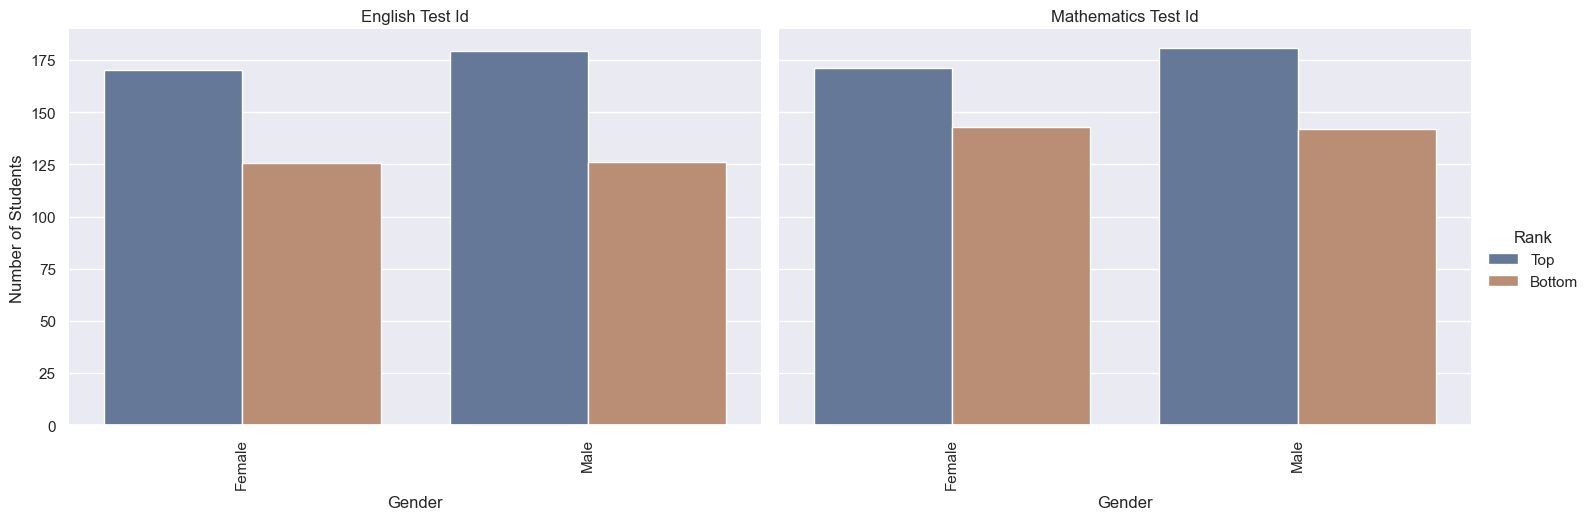

In [153]:
drawBarplotCatplot(dfTop_Low, "Gender", saturation_p, aspect_p, "Student Groups", "Students with Scores", "Test Id", "Rank")

**Ethnicity**

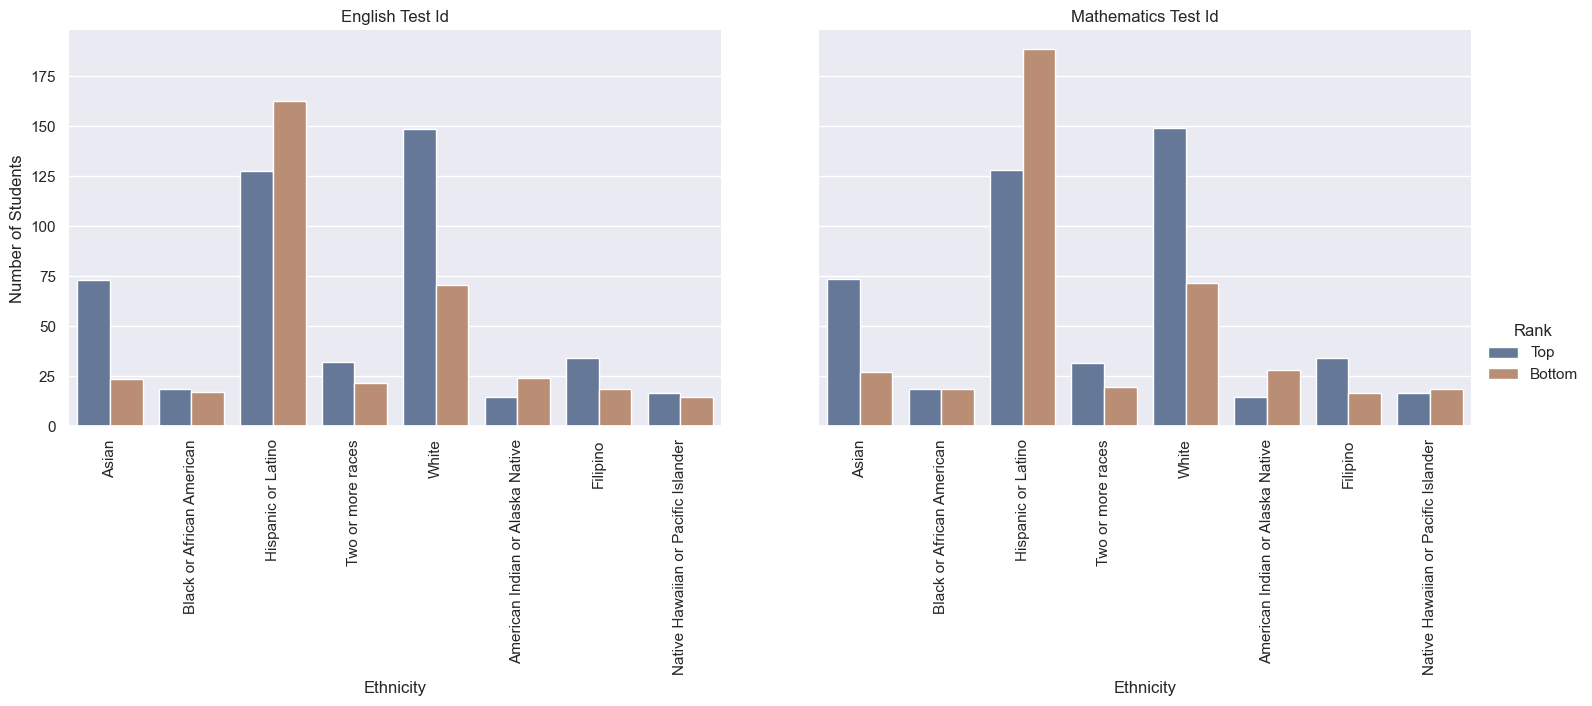

In [156]:
drawBarplotCatplot(dfTop_Low, "Ethnicity", saturation_p, aspect_p, "Student Groups", "Students with Scores", "Test Id", "Rank")

**English-Language Fluency**

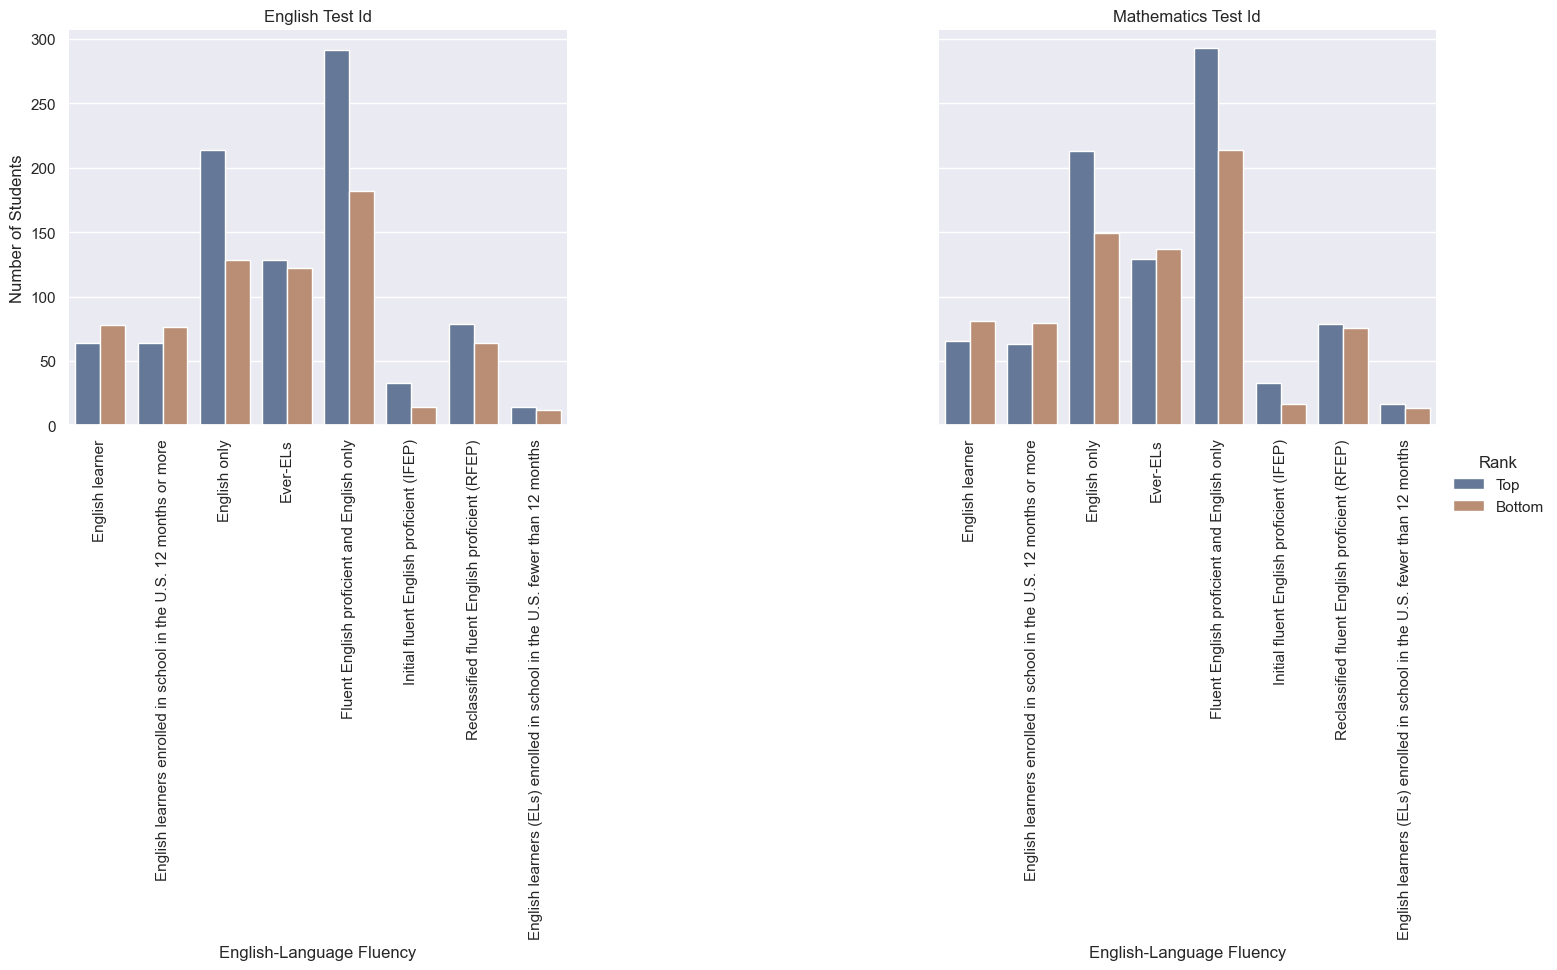

In [158]:
drawBarplotCatplot(dfTop_Low, "English-Language Fluency", saturation_p, aspect_p, "Student Groups", "Students with Scores", "Test Id", "Rank")

**Economic Status**

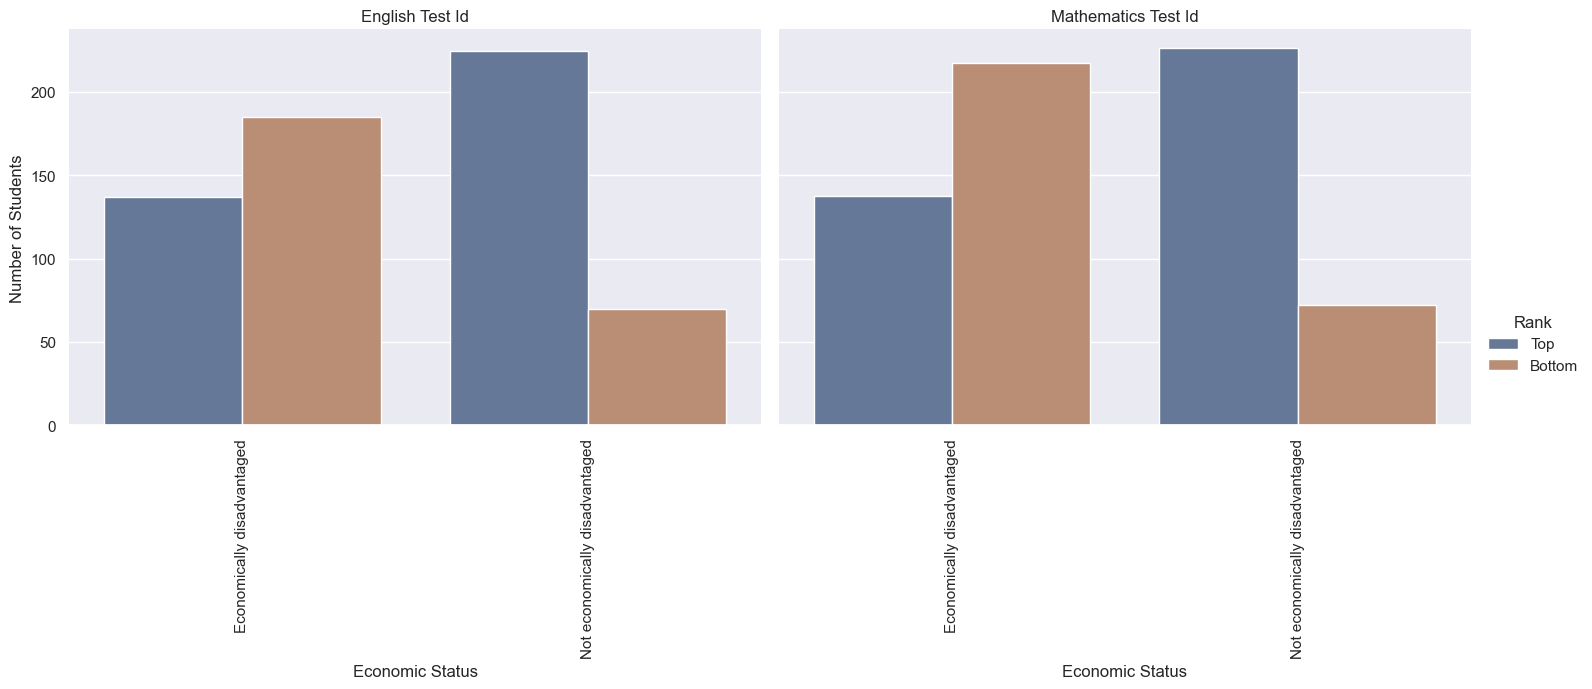

In [160]:
drawBarplotCatplot(dfTop_Low, "Economic Status", saturation_p, aspect_p, "Student Groups", "Students with Scores", "Test Id", "Rank")

**Parent Education**

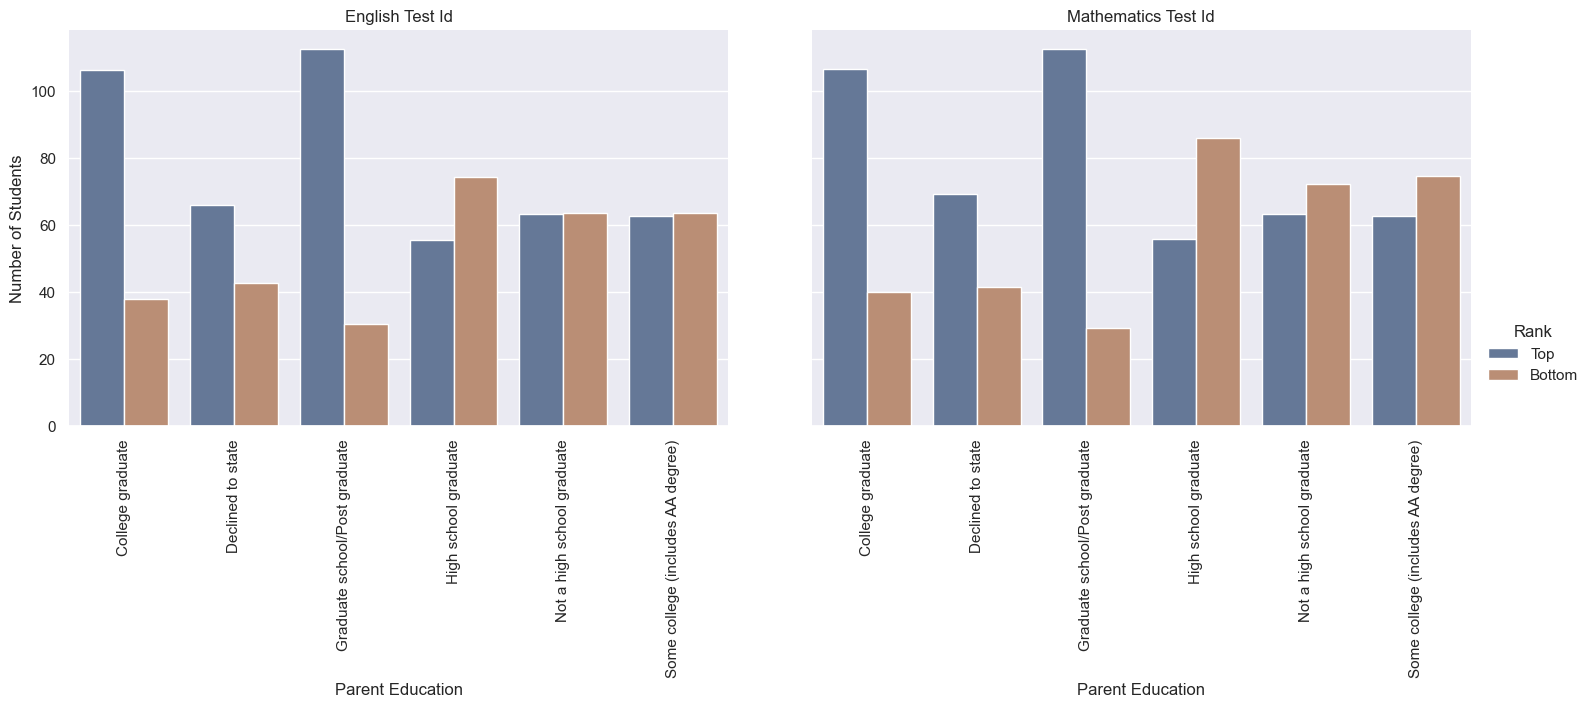

In [162]:
drawBarplotCatplot(dfTop_Low, "Parent Education", saturation_p, aspect_p, "Student Groups", "Students with Scores", "Test Id", "Rank")

### [Individual Top and Bottom schools in Each Category]

In [166]:
# List of data of the best performance students for each student groups
idx = final_data_school.groupby(["Category", "Student Groups"])["Percentage Standard Exceeded"].transform(max) == final_data_school["Percentage Standard Exceeded"]
final_data_school[idx].head()

C:\Users\user\AppData\Local\Temp\ipykernel_19200\2977269062.py:2: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.



,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
6357,1,All Students,All Students,19,64733,133736,2018,7,Los Angeles,Los Angeles Unified,Science Academy Stem Magnet,91423,Mathematics,92.82,6.22,0.96,0.0,209.0,95.69,4.31,0.0,88.04,11.96,0.00,89.95,10.05,0.0,0.00,0.00,0.0,1092600
23781,3,Male,Gender,19,64733,133736,2018,7,Los Angeles,Los Angeles Unified,Science Academy Stem Magnet,91423,Mathematics,94.37,4.93,0.70,0.0,142.0,97.18,2.82,0.0,88.03,11.97,0.00,90.85,9.15,0.0,0.00,0.00,0.0,1092600
38313,4,Female,Gender,19,64212,1931880,2018,7,Los Angeles,Abc Unified,Whitney (Gretchen) High,90703,English,91.48,8.20,0.33,0.0,305.0,90.49,9.51,0.0,94.43,5.25,0.33,67.21,32.79,0.0,91.15,8.85,0.0,722800
58087,6,Fluent English proficient and English only,English-Language Fluency,19,64733,133736,2018,7,Los Angeles,Los Angeles Unified,Science Academy Stem Magnet,91423,Mathematics,92.82,6.22,0.96,0.0,209.0,95.69,4.31,0.0,88.04,11.96,0.00,89.95,10.05,0.0,0.00,0.00,0.0,1092600
69450,7,Initial fluent English proficient (IFEP),English-Language Fluency,1,61275,6002281,2018,7,Alameda,Piedmont City Unified,Beach Elementary,94611,English,100.00,0.00,0.00,0.0,11.0,90.91,9.09,0.0,72.73,27.27,0.00,72.73,27.27,0.0,90.91,9.09,0.0,1287100


In [169]:
# List of data of the lowest performance students for each student groups
idx = final_data_school.groupby(["Category", "Student Groups"])["Percentage Standard Not Met"].transform(max) == final_data_school["Percentage Standard Not Met"]
final_data_school[idx].head()

C:\Users\user\AppData\Local\Temp\ipykernel_19200\4144136985.py:2: FutureWarning:

The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.



,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
12,1,All Students,All Students,1,61259,132688,2018,7,Alameda,Oakland Unified,Dewey Academy,94606,Mathematics,0.0,0.0,0.0,100.0,37.0,0.0,0.00,100.00,0.0,18.92,81.08,0.0,10.81,89.19,0.0,0.00,0.00,684400
65,1,All Students,All Students,1,10017,130419,2018,7,Alameda,Alameda County Office Of Education,Alameda County Community,94544,Mathematics,0.0,0.0,0.0,100.0,30.0,0.0,0.00,100.00,0.0,6.67,93.33,0.0,16.67,83.33,0.0,0.00,0.00,649300
103,1,All Students,All Students,1,61259,130146,2018,7,Alameda,Oakland Unified,Rudsdale Continuation,94605,Mathematics,0.0,0.0,0.0,100.0,48.0,0.0,0.00,100.00,0.0,6.25,93.75,0.0,25.00,75.00,0.0,0.00,0.00,655900
104,1,All Students,All Students,1,61259,130146,2018,7,Alameda,Oakland Unified,Rudsdale Continuation,94605,English,0.0,0.0,0.0,100.0,48.0,0.0,20.83,79.17,0.0,0.00,100.00,0.0,31.25,68.75,0.0,8.33,91.67,655900
938,1,All Students,All Students,7,10074,120444,2018,7,Contra Costa,Contra Costa County Office Of Education,Mt. Mckinley,94553,Mathematics,0.0,0.0,0.0,100.0,60.0,0.0,0.00,100.00,0.0,10.00,90.00,0.0,28.33,71.67,0.0,0.00,0.00,613200


## Correlations Using Scatterplots

We provide the scatter plots between two following factors.  
* Percentage of Standard Exceeded vs. House prices
* Percentage of Standard Not Met vs. House prices
   
### [Results]
We could observe the strong correlations between the test scores and the house prices.
In conclusion, students who live in areas with high housing prices have higher test scores.

In [170]:
def drawScatterplot(df, category, levelName, perfCol):
    df_local = df.loc[(df['Category'] == category)]
    #g = sns.FacetGrid(df_local, col="Test Id", hue="Student Groups")
    g = sns.FacetGrid(df_local, col="Test Id", hue="Student Groups", size=10)
    g.map(plt.scatter, levelName, perfCol, alpha=.7)
    g.add_legend();
    g.set_xticklabels(rotation=90) 

### Test Achievements vs. House Prices

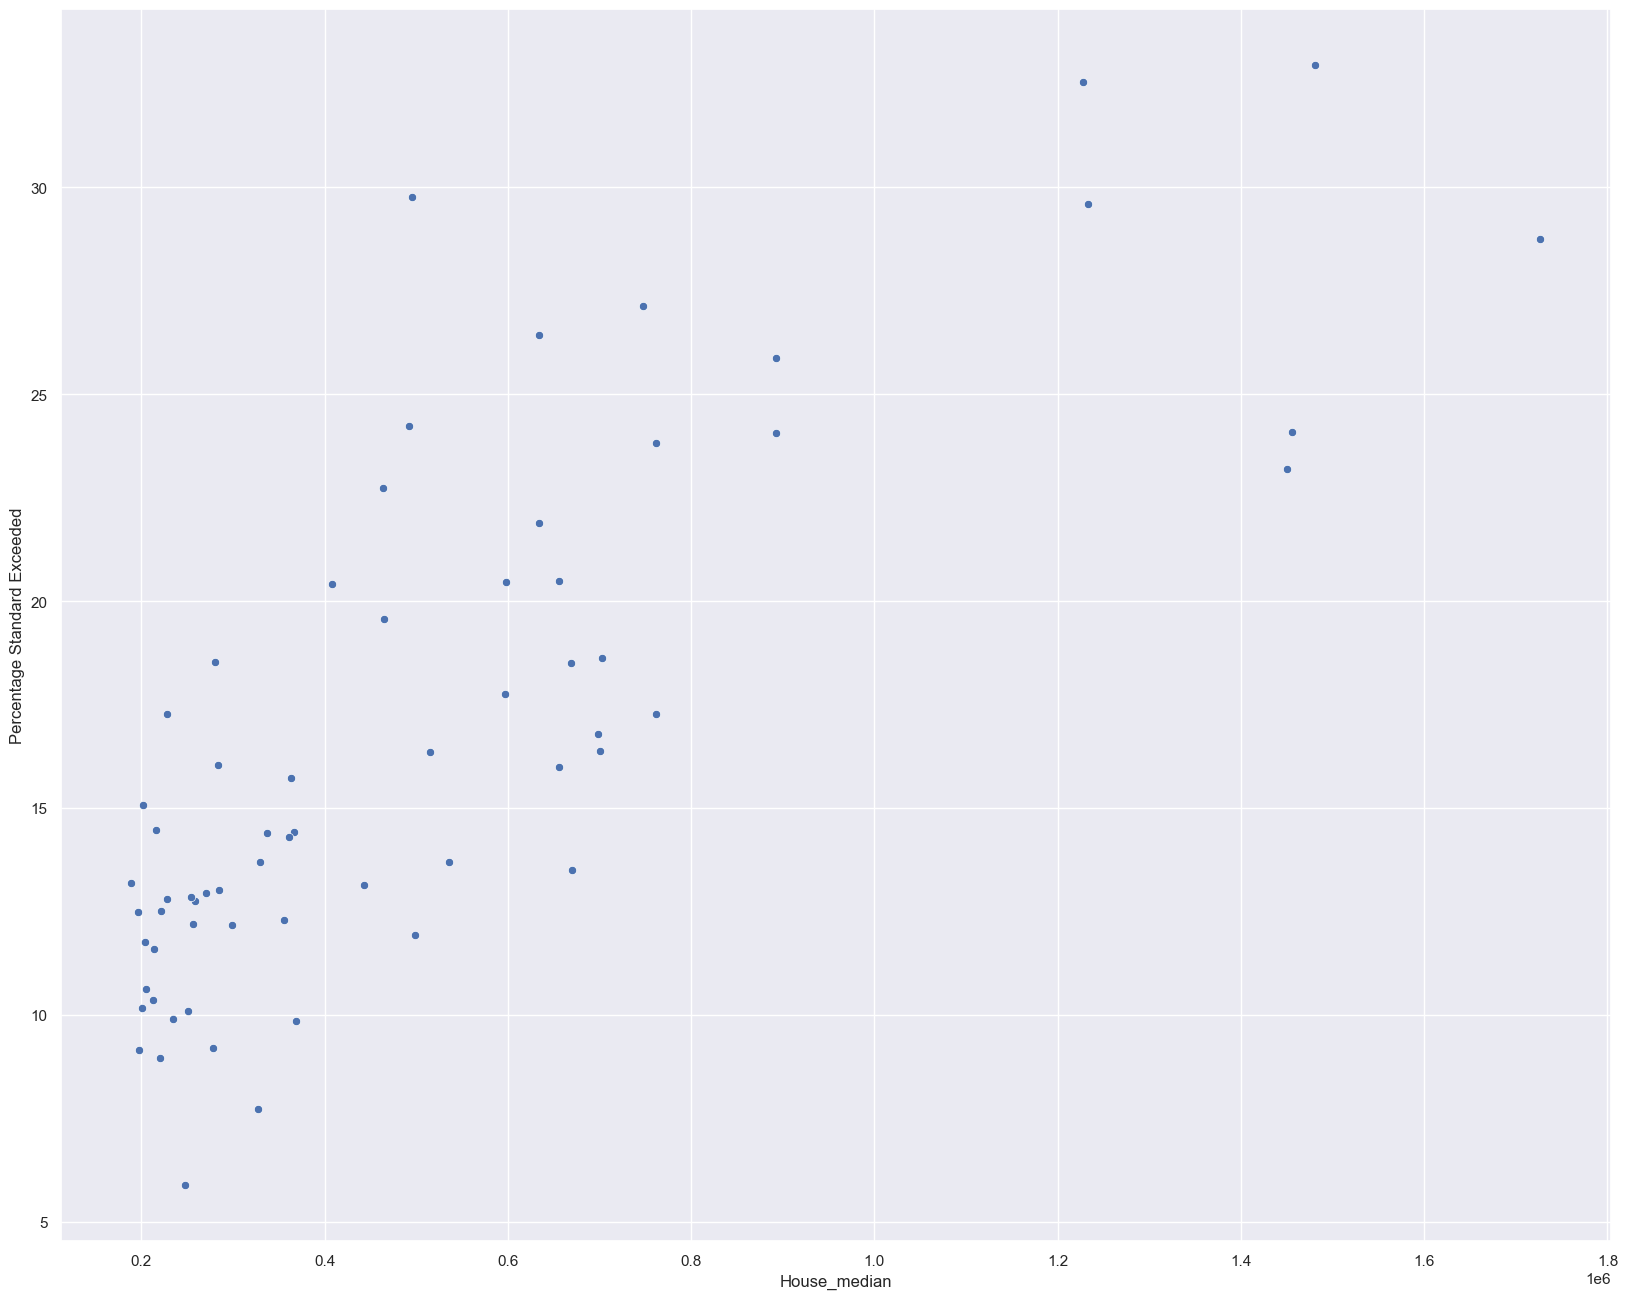

In [173]:
df_local = final_data.loc[(final_data['Student Groups'] == "All Students")].groupby('School Code').mean(numeric_only=True)
ax = sns.scatterplot(x="House_median", y='Percentage Standard Exceeded', data=df_local)

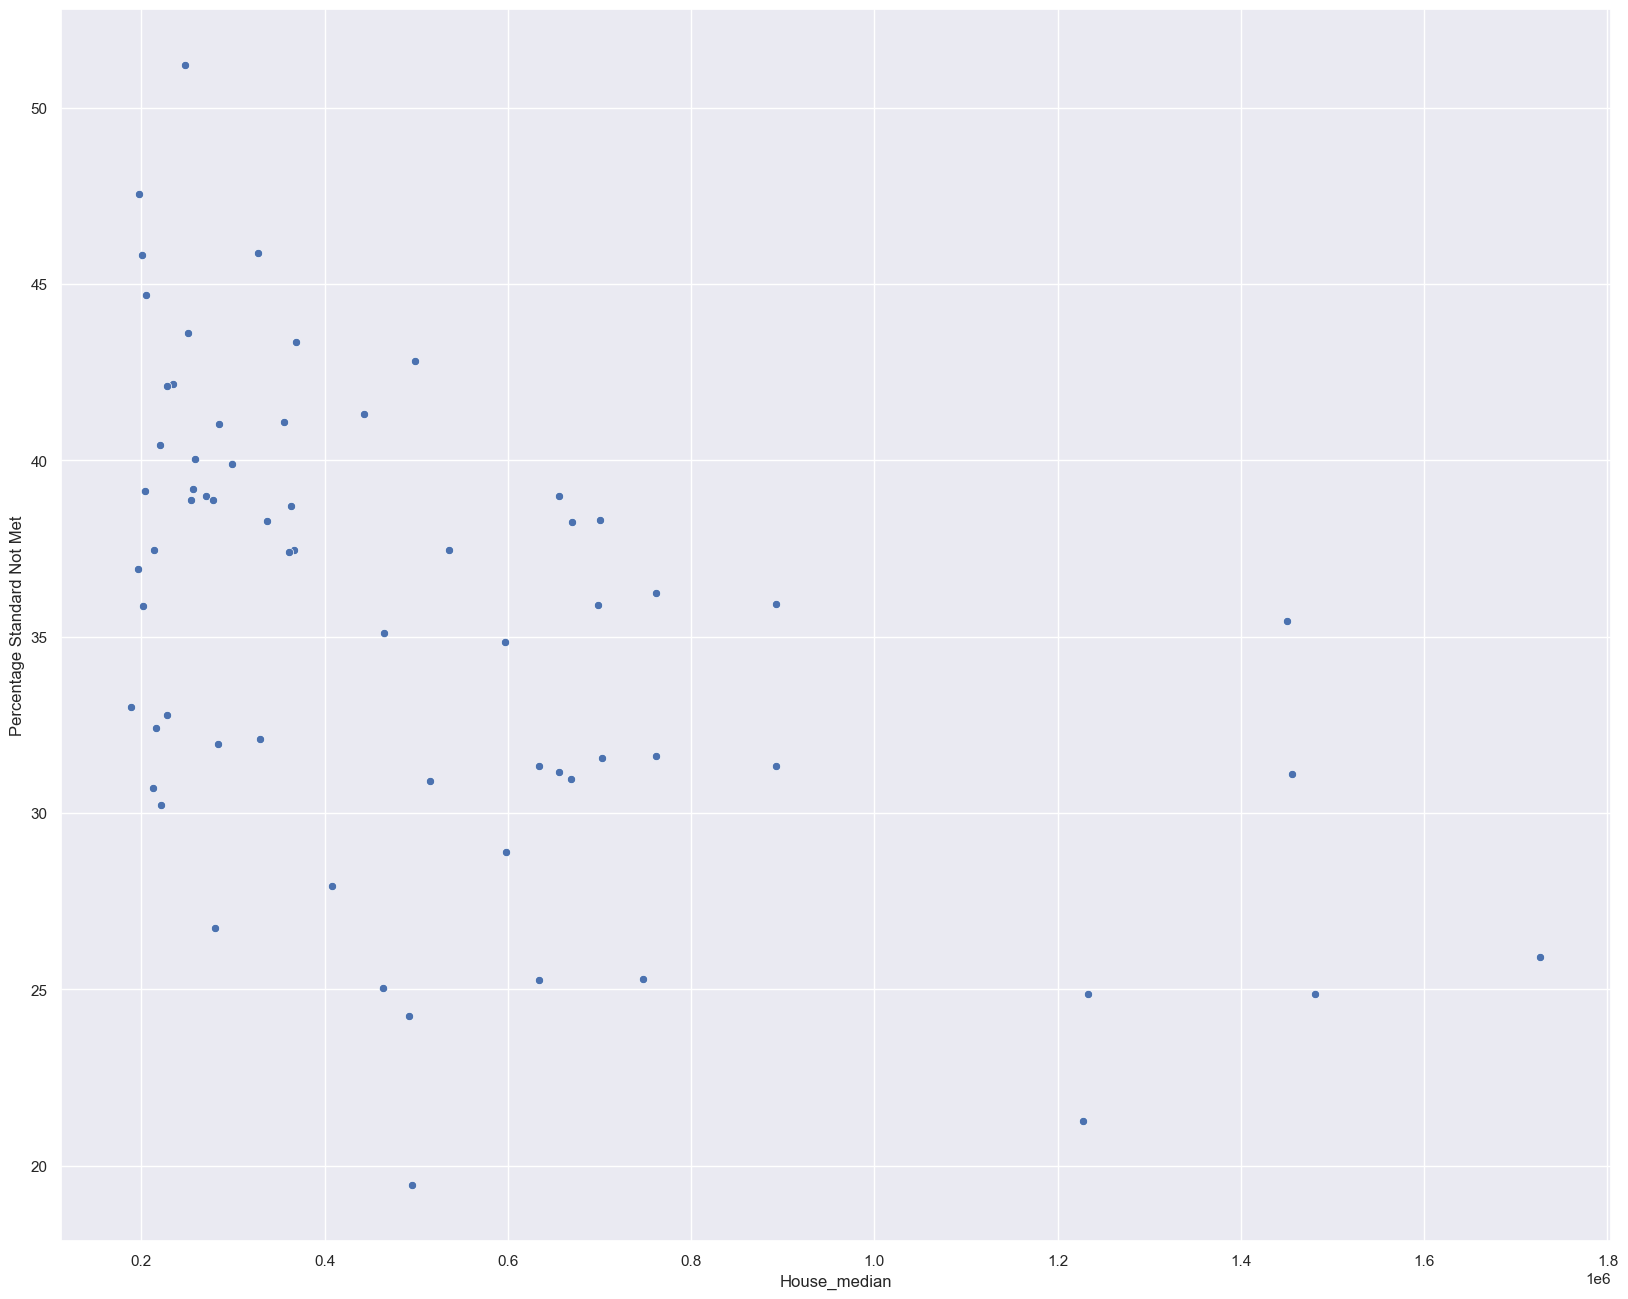

In [174]:
df_local = final_data.loc[(final_data['Student Groups'] == "All Students")].groupby('School Code').mean(numeric_only=True)
ax = sns.scatterplot(x="House_median", y='Percentage Standard Not Met', data=df_local)

## Future Work


* Time-Series plots
    * Year 2015, 2016, 2017, 2018: Percentage of Standard Exceeded of (current year - last year)] 
* Histogram
    * House price correlation with the test performance (bin 10: house_cost <25K, ...., house_cost > 100k)
* More external factors
    * Teachers demographics
* Bokeh or Plotly libraries 
    * Switch barplots to interactive graphs
    * Longitude, latitude information to visualize the score distribution on the map (Plotly libraries)
* Use more of special metrics
    * Ex) Score_gap = |Standard Exceeded % - Standard Not Met %|

**Need to be more considered**  
* Not all data available for subgroups - skewed?
* Need to eliminate outliers?
    * Ex) (new schools (e.g., Eastwood elementary), etc.) - top and bottom 5% schools need to be excluded.
* Further analysis on the High-income whites vs. Low-income whites 
    * Ex) (df.loc[(df['House_median'] > 130k) & (df['Subgroup Id'] == whites)]
* More insights? Trends? More hypothesis?
    * Much more score differnces in mathematics in (high schools groups / minority groups)

### Miscellaneous

Functions

In [176]:
def getScoreLevel(df):
    scoreLevel = ''
    for col in df.columns:
        if col == "county Name" or col == "District Name" or col == "School Name":
            if not df[col].isnull().any().any():
                print(col)
                scoreLevel = re.sub('Name', '', col)
    return scoreLevel

def get_id_vals(df):
    final_id_vars = []
    scoreLevel = getScoreLevel(df)
    if "School" in scoreLevel:
        final_id_var = final_id_vars_schools
    elif "District" in scoreLevel:
        fina_id_vars = final_id_vars_districts
    elif "County" in scoreLevel:
        final_id_vars = final_id_vars_counties
    else:
        print("no matching level")
    return final_id_vars

In [179]:
# Create a column "ratio"
# scoreLevel: "School Name", "District Name", "County Name"
def createColumnApply(df, scoreLevel, category, sum_col, new_col):
    
    # flatten multi-indexx for the results obtained from a groupby
    df_sum = df.groupby([scoreLevel, category], as_index=False).sum()
    
    # create new column "Scores_sum": sum groued by category
    df_sum[new_col] = df_sum[sum_col]
    
    df_newcol = pd.merge(df, df_sum[[scoreLevel, category, new_col]],
                        how='left', on=[scoreLevel, category])
    
    # create a new column using Lambda func
    # axis = 1 or "columns": apply function to each row
    # apply function should be modified for the usage
    df_newcol['ratio'] = df_newcol.apply(lambda x: x[sum_col]/x[new_col]*100, axis=1)
    
    # formatted to second decimal place
    df_newcol = df_newcol.round(2)

**School Types**

We could not find any special results regarding the school type

Type Id

'07' = School

'09' = Direct Funded Charter School

'10' = Locally Funded Charter School

C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\seaborn\axisgrid.py:718: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.

C:\ProgramData\anaconda3\envs\ml_dev\lib\site-packages\seaborn\axisgrid.py:723: UserWarning:

Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.



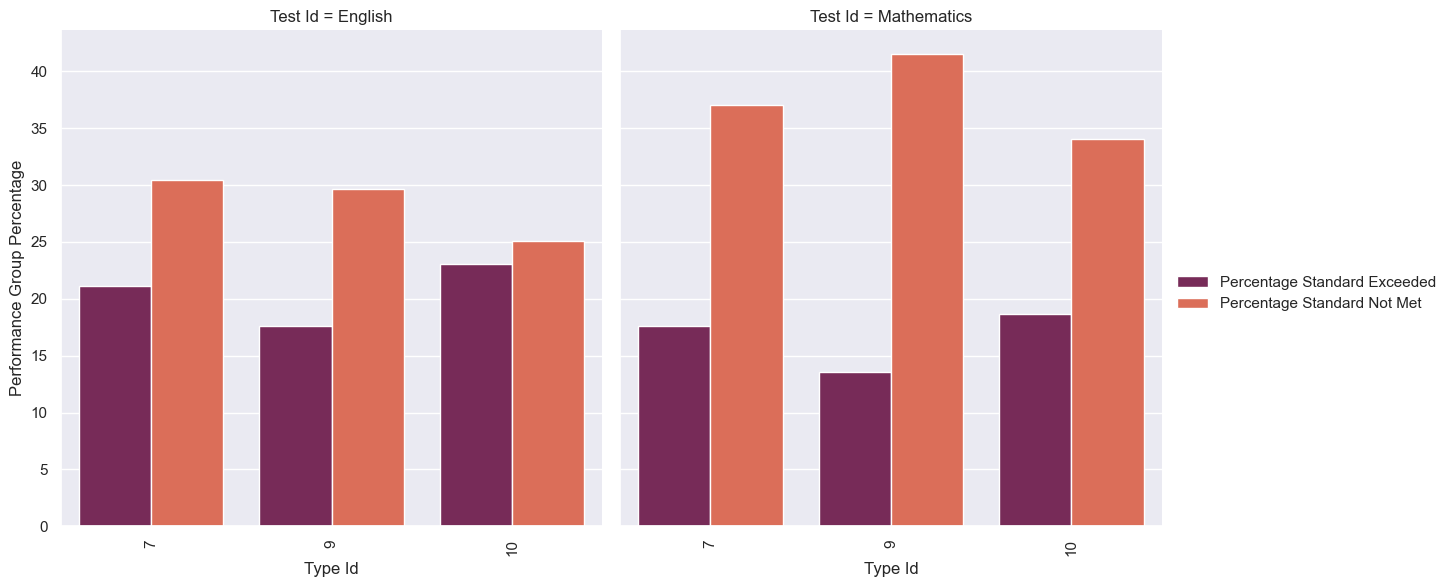

In [185]:
final_data_school_all_ex = pd.melt(final_data_scholl_all, id_vars=final_id_vars, value_vars=final_value_vars, var_name='Performance Group', value_name='Performance Group Percentage')

def drawBarplotFacetGridEx2(df, _col, perfCols):
    df_local = df.loc[df['Performance Group'].isin(perfCols)]
    
    g = sns.FacetGrid(df_local, col=_col, height=6)
    g.map(sns.barplot, "Type Id", "Performance Group Percentage", "Performance Group", palette="rocket", errorbar=None)
    g.add_legend()
    g.set_xticklabels(rotation=90)
    plt.show()
    
drawBarplotFacetGridEx2(final_data_school_all_ex, "Test Id", ['Percentage Standard Exceeded', 'Percentage Standard Not Met'])

**Specific schools, district, or counties (CDS)**

To obtain the test scores of specific schools, districts, or counties, the **exact school code** needs to be retrived from entity tables. When finding the school codes, you should specify a **county**, a **district**, and a **school** names because there may exist several schools with the same names. These are denoted as the **'CDS'**.

For example, if we want to obtain the school code of the `Eastwood Elementary` school in `Irvine` district and `Orange` county, we first select the DataFrame using the **county**, **district** and **school** condition all together.

Please note that if we specify only the school name(s), we could retrieve the several schools with name. It is important to include these three codes to avoid the double-counting in any summary calculations.

In [187]:
# shape: (44, 31)
final_data = final_data_scholl_all
df_eastwood = final_data.loc[(final_data['School Name'] == 'Eastwood Elementary') &
                            (final_data['District Name']== 'Irvine Unified') & 
                            (final_data['County Name'] == 'Orange'), :]

We can retrieve the DataFrame of the **county** and the **district**. For example, we can obtain the test score of `Irvine Unified` District as follows.

In [188]:
# irvine Unified Code
irvine_district = final_data.loc[(final_data['District Name'] == 'Irvine Unified') &
                                (final_data['County Name'] == 'Orange'), :]
irvine_district.head()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
9275,1,All Students,All Students,30,73650,127472,2018,7,Orange,Irvine Unified,Jeffrey Trail Middle,92620,Mathematics,60.85,19.84,11.30,8.01,1124.0,68.24,20.82,10.94,61.65,29.63,8.72,61.30,32.65,6.05,0.00,0.00,0.00,927300.0
9276,1,All Students,All Students,30,73650,127472,2018,7,Orange,Irvine Unified,Jeffrey Trail Middle,92620,English,46.26,37.46,9.96,6.32,1124.0,54.80,35.50,9.70,59.88,33.45,6.67,34.16,59.25,6.58,60.14,34.52,5.34,927300.0
9277,1,All Students,All Students,30,73650,129155,2018,7,Orange,Irvine Unified,Cypress Village Elementary,92620,Mathematics,49.72,22.33,16.89,11.07,533.0,57.41,26.45,16.14,49.53,36.40,14.07,49.91,38.46,11.63,0.00,0.00,0.00,927300.0
9278,1,All Students,All Students,30,73650,129155,2018,7,Orange,Irvine Unified,Cypress Village Elementary,92620,English,50.48,29.09,10.60,9.83,519.0,45.28,43.55,11.18,53.95,34.10,11.95,41.04,51.64,7.32,54.14,36.99,8.86,927300.0
9279,1,All Students,All Students,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,37.16,33.49,18.35,11.01,218.0,50.92,33.49,15.60,40.37,43.58,16.06,36.70,50.46,12.84,0.00,0.00,0.00,927300.0


In [189]:
# retrieve only "Elementary schools"
irvine_district_elementary = irvine_district[irvine_district["School Name"].str.contains('Elementary')]
irvine_district_elementary.head()

,Subgroup ID,Student Groups,Category,County Code,District Code,School Code,Test Year,Type Id,County Name,District Name,School Name,Zip Code,Test Id,Percentage Standard Exceeded,Percentage Standard Met,Percentage Standard Nearly Met,Percentage Standard Not Met,Students with Scores,Area 1 Percentage Above Standard,Area 1 Percentage Near Standard,Area 1 Percentage Below Standard,Area 2 Percentage Above Standard,Area 2 Percentage Near Standard,Area 2 Percentage Below Standard,Area 3 Percentage Above Standard,Area 3 Percentage Near Standard,Area 3 Percentage Below Standard,Area 4 Percentage Above Standard,Area 4 Percentage Near Standard,Area 4 Percentage Below Standard,House_median
9277,1,All Students,All Students,30,73650,129155,2018,7,Orange,Irvine Unified,Cypress Village Elementary,92620,Mathematics,49.72,22.33,16.89,11.07,533.0,57.41,26.45,16.14,49.53,36.40,14.07,49.91,38.46,11.63,0.00,0.00,0.00,927300.0
9278,1,All Students,All Students,30,73650,129155,2018,7,Orange,Irvine Unified,Cypress Village Elementary,92620,English,50.48,29.09,10.60,9.83,519.0,45.28,43.55,11.18,53.95,34.10,11.95,41.04,51.64,7.32,54.14,36.99,8.86,927300.0
9279,1,All Students,All Students,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,Mathematics,37.16,33.49,18.35,11.01,218.0,50.92,33.49,15.60,40.37,43.58,16.06,36.70,50.46,12.84,0.00,0.00,0.00,927300.0
9280,1,All Students,All Students,30,73650,135137,2018,7,Orange,Irvine Unified,Eastwood Elementary,92620,English,34.55,36.65,15.18,13.61,191.0,39.27,42.93,17.80,40.31,43.98,15.71,22.51,64.92,12.57,36.65,48.69,14.66,927300.0
9283,1,All Students,All Students,30,73650,6085344,2018,7,Orange,Irvine Unified,Woodbury Elementary,92620,Mathematics,38.43,32.44,19.21,9.92,635.0,52.60,30.87,16.54,42.83,42.83,14.33,44.41,42.52,13.07,0.00,0.00,0.00,927300.0


* English Top 10 School Names:
['Turtle Rock Elementary', 'Santiago Hills Elementary', 'Stonegate Elementary', 'Brywood Elementary', 'Portola Springs Elementary', 'Meadow Park Elementary', 'Westpark Elementary', 'Deerfield Elementary', 'Canyon View Elementary', 'Eastshore Elementary']
* Mathematics Top 10 School Names:
['Turtle Rock Elementary', 'Santiago Hills Elementary', 'Brywood Elementary', 'Stonegate Elementary', 'Westpark Elementary', 'Canyon View Elementary', 'Deerfield Elementary', 'Portola Springs Elementary', 'Cypress Village Elementary', 'Stone Creek Elementary']
* English Low 10 School Names:
['Culverdale Elementary', 'University Park Elementary', 'Springbrook Elementary', 'Greentree Elementary', 'Eastwood Elementary', 'Northwood Elementary', 'Oak Creek Elementary', 'Brywood Elementary', 'Cypress Village Elementary', 'Woodbury Elementary']
* Mathematics Low 10 School Names:
['Culverdale Elementary', 'University Park Elementary', 'Northwood Elementary', 'Springbrook Element

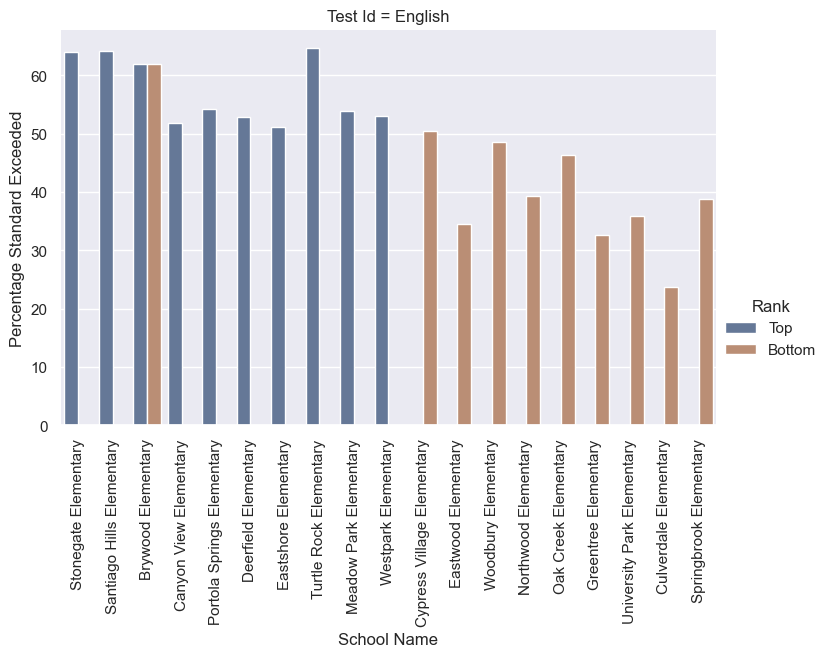

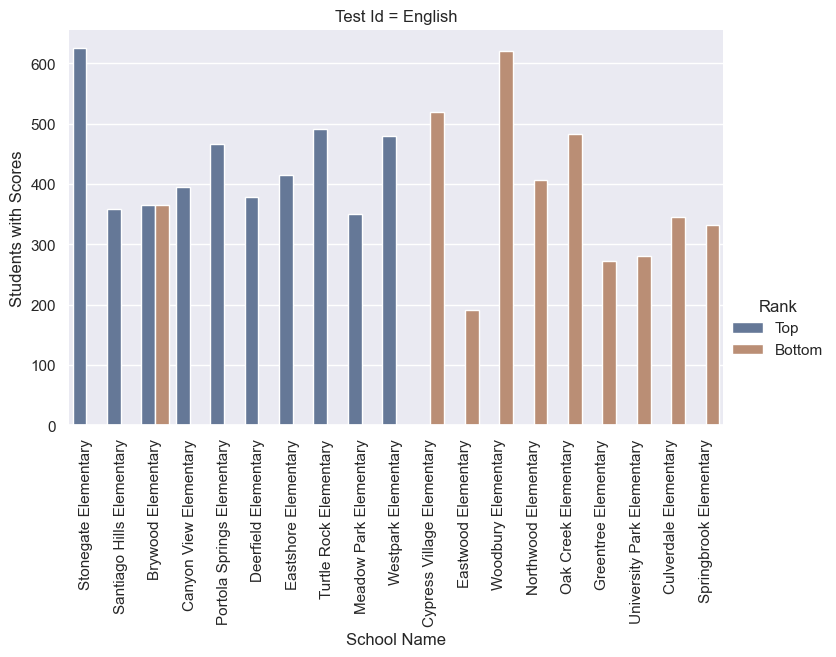

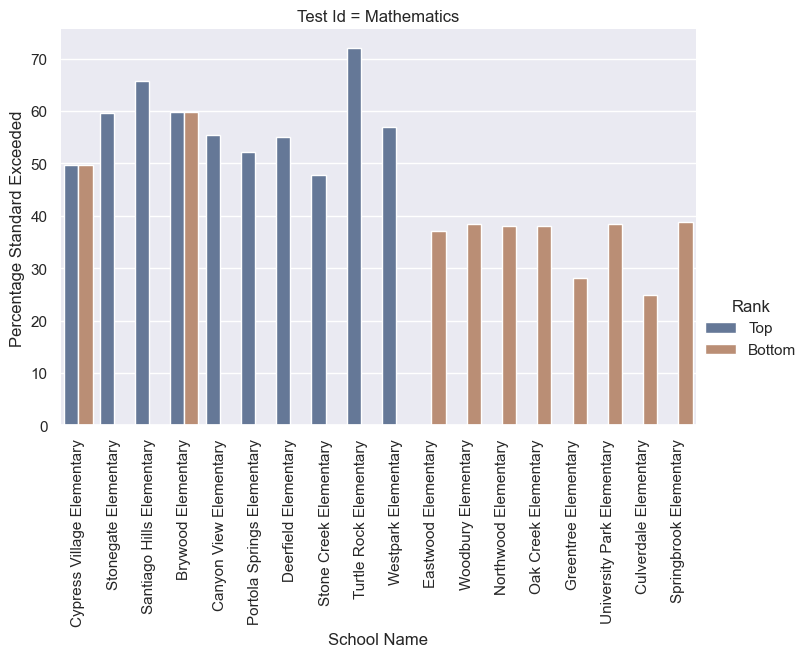

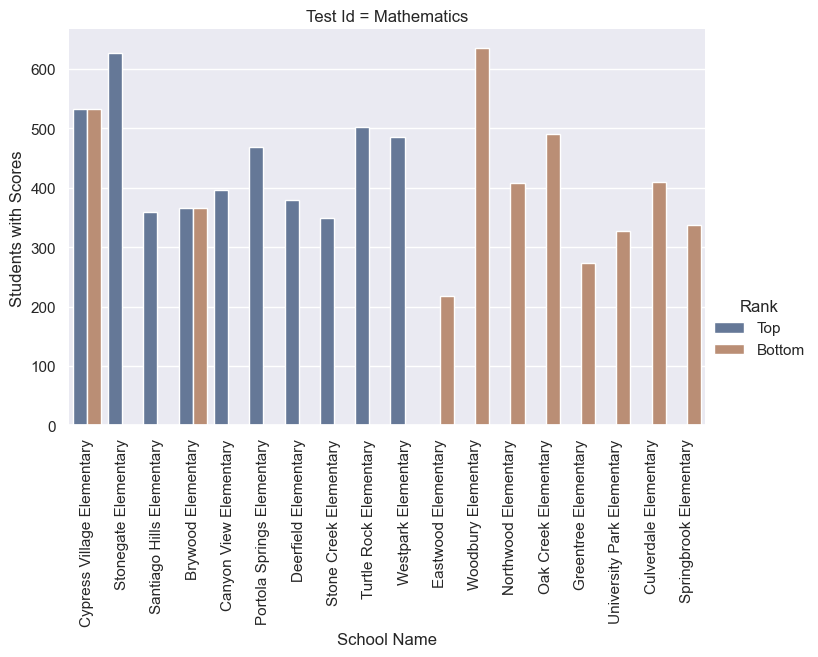

In [191]:
dfTop_Low_irvine = getDfTop_Low(irvine_district_elementary, "School Name", 10)

drawBarplotCatplot1(dfTop_Low_irvine, "All Students", "English", "School Name", "Percentage Standard Exceeded", "Rank", "Test Id")
drawBarplotCatplot1(dfTop_Low_irvine, "All Students", "English", "School Name", "Students with Scores", "Rank", "Test Id")


drawBarplotCatplot1(dfTop_Low_irvine, "All Students", "Mathematics", "School Name", "Percentage Standard Exceeded", "Rank", "Test Id")
drawBarplotCatplot1(dfTop_Low_irvine, "All Students", "Mathematics", "School Name", "Students with Scores", "Rank", "Test Id")

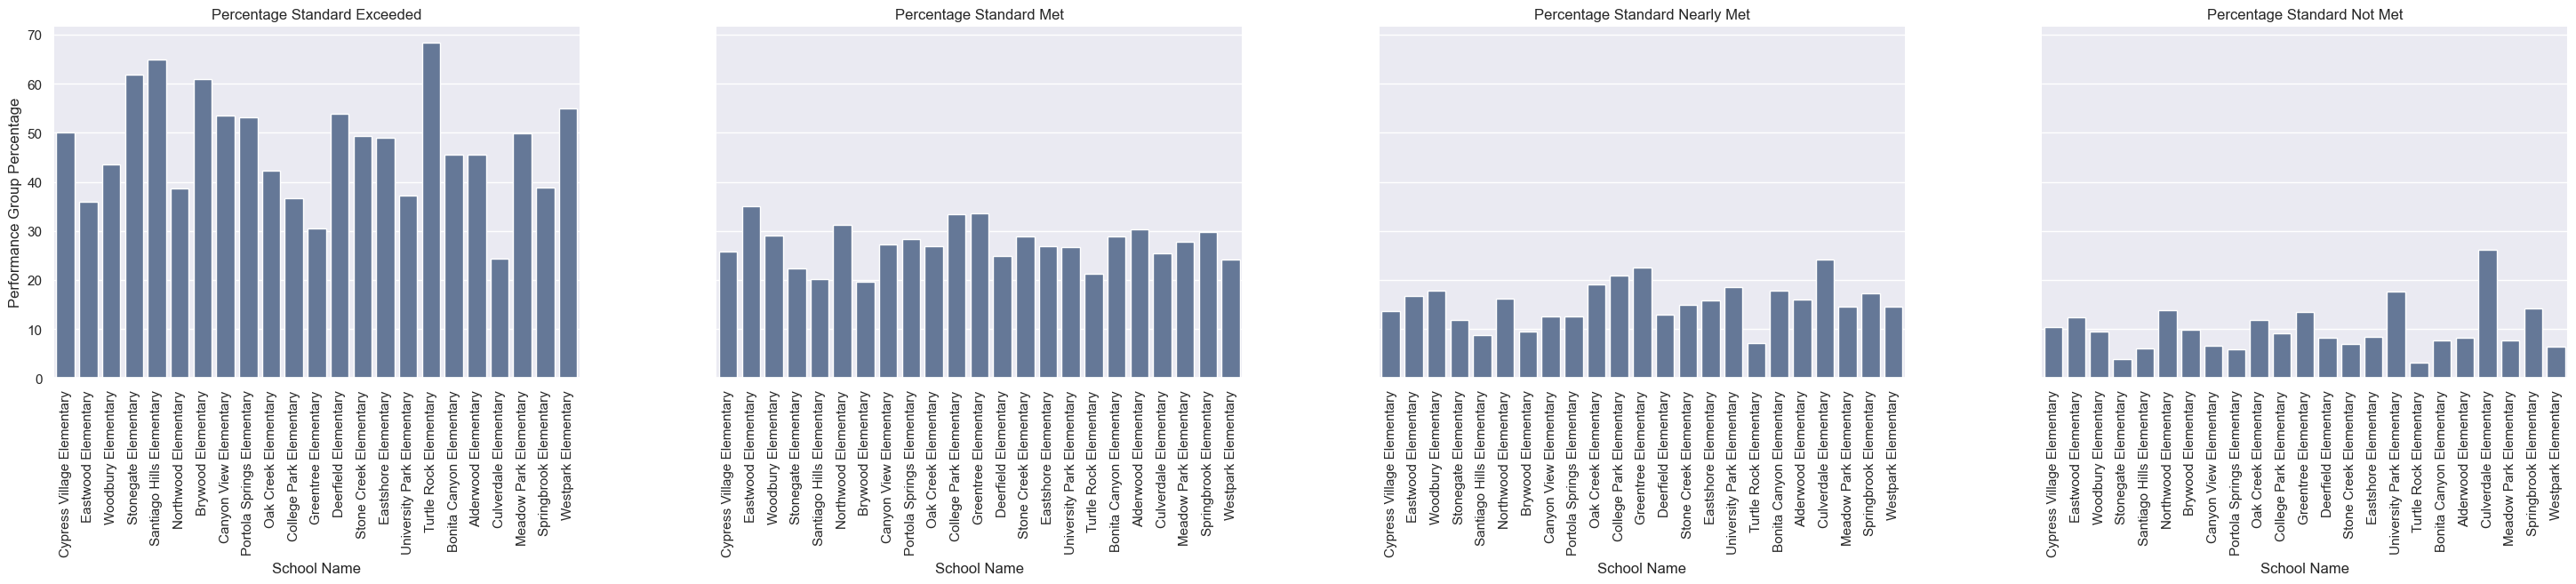

In [193]:
irvine_district_elementary_ex = pd.melt(irvine_district_elementary, id_vars=final_id_vars, value_vars=final_value_vars, var_name='Performance Group', value_name='Performance Group Percentage')
drawBarplotCatplot2(irvine_district_elementary_ex, 'All Students', saturation_p, aspect_p, "School Name", "Performance Group Percentage", "Performance Group")

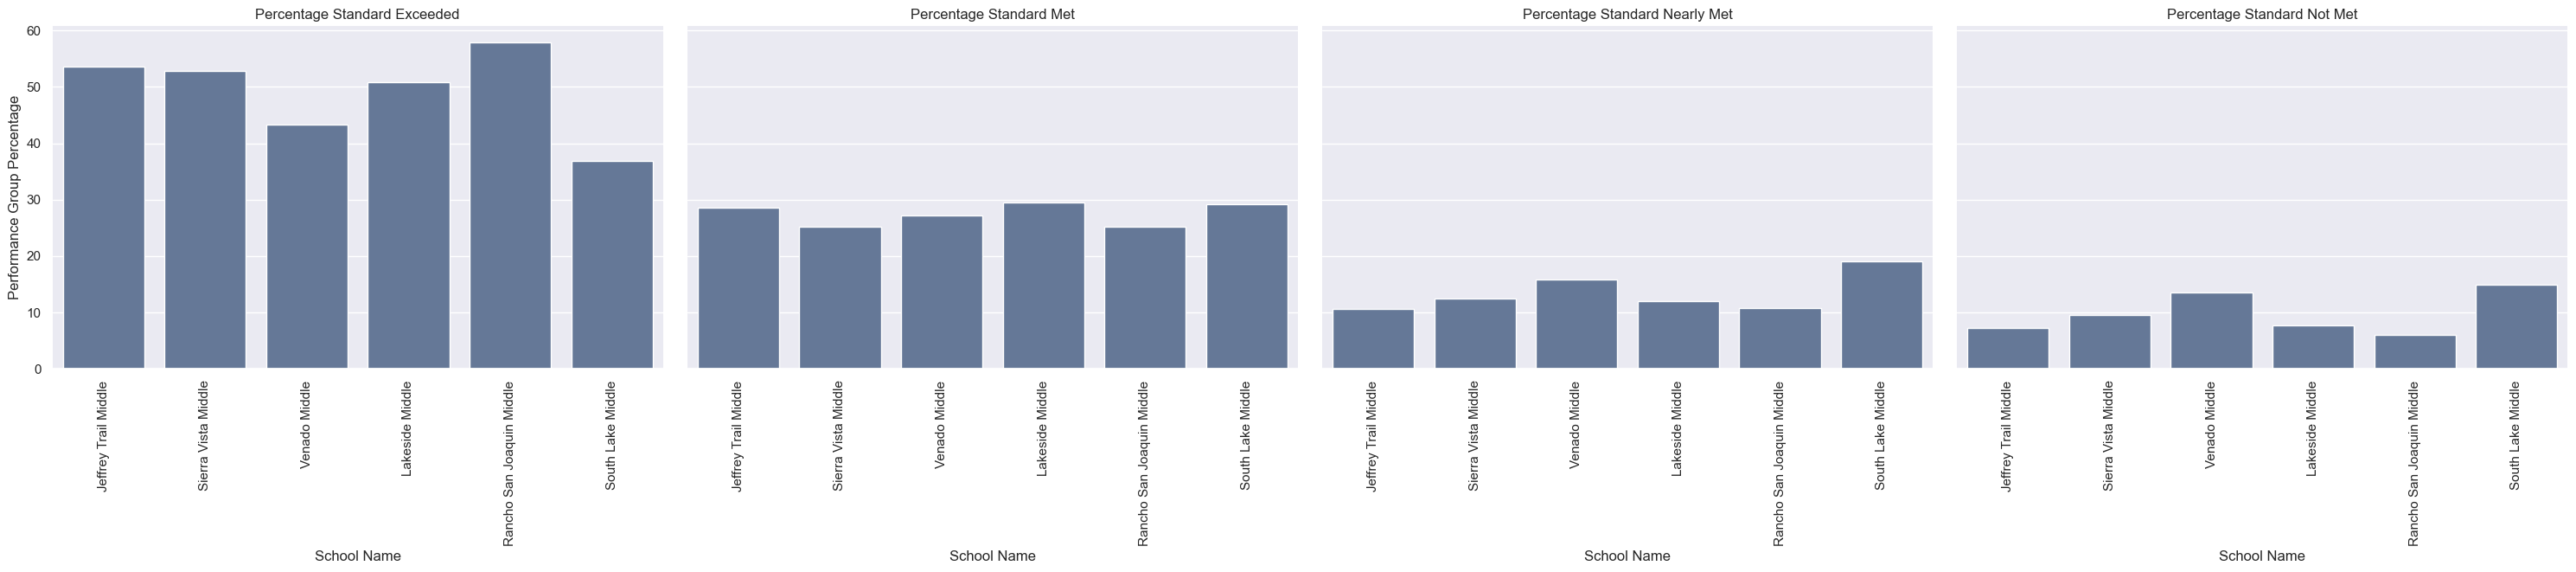

In [194]:
irvine_district_middle = irvine_district[irvine_district["School Name"].str.contains('Middle')]
irvine_district_middle_ex = pd.melt(irvine_district_middle, id_vars=final_id_vars, value_vars=final_value_vars, var_name='Performance Group', value_name='Performance Group Percentage')
drawBarplotCatplot2(irvine_district_middle_ex, 'All Students', saturation_p, aspect_p, "School Name", "Performance Group Percentage", "Performance Group")

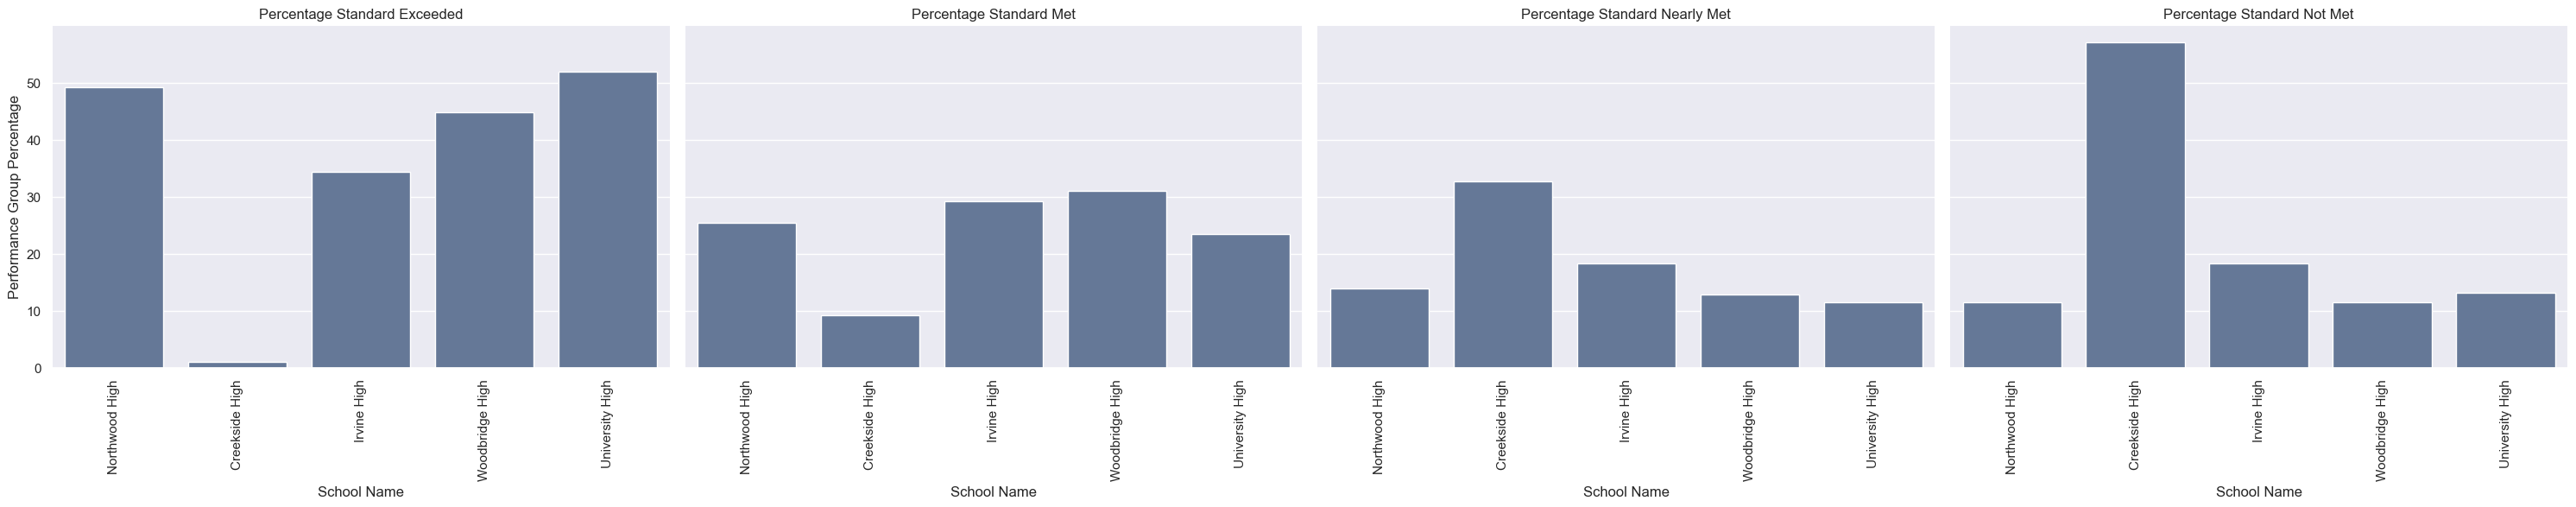

In [195]:
irvine_district_high = irvine_district[irvine_district["School Name"].str.contains('High')]
irvine_district_high_ex = pd.melt(irvine_district_high, id_vars=final_id_vars, value_vars=final_value_vars, var_name='Performance Group', value_name='Performance Group Percentage')
drawBarplotCatplot2(irvine_district_high_ex, 'All Students', saturation_p, aspect_p, "School Name", "Performance Group Percentage", "Performance Group")